Import Libraries
###### Uncomment block to setup environment if not already installed

In [ ]:
# !pip install seaborn
# !pip install kagglehub
# !pip install pandas
# !pip install matplotlib
# !pip install sklearn
# !pip install scipy
# !pip install statsmodels
# !pip install pingouin
# !pip install xgboost
# !pip install streamlit

In [215]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import xgboost as xgb
import numpy as np
import streamlit as st
import pickle
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats.mstats import winsorize
from statsmodels.stats.oneway import anova_oneway

Import Data

In [105]:
path = kagglehub.dataset_download("debajyotipodder/co2-emission-by-vehicles")
data = pd.read_csv(path + '/CO2 Emissions_Canada.csv')

Assign Data to dataframe

In [106]:
df = pd.DataFrame(data)

Check for missing values and improper data.

In [107]:
df.describe()

Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000                          4.100000   
25%                           7.500000                          8.900000   
50%                           8.700000                         10.600000   
75%                          10.200000                         12.600000   
max                          20.600000                         26.100000   

       Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
count                  7385.000000          7385.000000  
mean                     27.481652           250.584699  
std                       7.231879            58.512679  
min                      11.000000            96.000000  
25%                      22.000000           208.000000  
50%                      27.000000           246.000000  
75%                      32.000000           288.000000  
max                      69.000000           522.000000

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [109]:
df.head(15)

Make       Model Vehicle Class  Engine Size(L)  Cylinders  \
0          ACURA         ILX       COMPACT             2.0          4   
1          ACURA         ILX       COMPACT             2.4          4   
2          ACURA  ILX HYBRID       COMPACT             1.5          4   
3          ACURA     MDX 4WD   SUV - SMALL             3.5          6   
4          ACURA     RDX AWD   SUV - SMALL             3.5          6   
5          ACURA         RLX      MID-SIZE             3.5          6   
6          ACURA          TL      MID-SIZE             3.5          6   
7          ACURA      TL AWD      MID-SIZE             3.7          6   
8          ACURA      TL AWD      MID-SIZE             3.7          6   
9          ACURA         TSX       COMPACT             2.4          4   
10         ACURA         TSX       COMPACT             2.4          4   
11         ACURA         TSX       COMPACT             3.5          6   
12    ALFA ROMEO          4C    TWO-SEATER             1.8          4   
13  ASTON MARTIN         DB9   MINICOMPACT             5.9         12   
14  ASTON MARTIN      RAPIDE    SUBCOMPACT             5.9         12   

   Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0           AS5         Z                               9.9   
1            M6         Z                              11.2   
2           AV7         Z                               6.0   
3           AS6         Z                              12.7   
4           AS6         Z                              12.1   
5           AS6         Z                              11.9   
6           AS6         Z                              11.8   
7           AS6         Z                              12.8   
8            M6         Z                              13.4   
9           AS5         Z                              10.6   
10           M6         Z                              11.2   
11          AS5         Z                              12.1   
12          AM6         Z                               9.7   
13           A6         Z                              18.0   
14           A6         Z                              18.0   

    Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                               6.7                               8.5   
1                               7.7                               9.6   
2                               5.8                               5.9   
3                               9.1                              11.1   
4                               8.7                              10.6   
5                               7.7                              10.0   
6                               8.1                              10.1   
7                               9.0                              11.1   
8                               9.5                              11.6   
9                               7.5                               9.2   
10                              8.1                               9.8   
11                              8.3                              10.4   
12                              6.9                               8.4   
13                             12.6                              15.6   
14                             12.6                              15.6   

    Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                            33                  196  
1                            29                  221  
2                            48                  136  
3                            25                  255  
4                            27                  244  
5                            28                  230  
6                            28                  232  
7                            25                  255  
8                            24                  267  
9                            31                  212  
10                           29                  225  
11   

In [110]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [111]:
df[['CO2 Emissions(g/km)', 'Fuel Consumption Comb (mpg)', 'Cylinders', 'Engine Size(L)']] = df[['CO2 Emissions(g/km)', 'Fuel Consumption Comb (mpg)', 'Cylinders', 'Engine Size(L)']].astype(float)
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                           float64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)         float64
CO2 Emissions(g/km)                 float64
dtype: object

In [112]:
print(df['Make'].unique())

['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']


In [113]:
# Too many to count for incorrect spelling
print(df['Model'].unique())

['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']


In [114]:
print(df['Transmission'].unique())

['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' 'AV' 'A5' 'AS7' 'A9' 'AS9' 'AV6' 'AS4' 'AM5' 'AM8' 'AM9' 'AS10'
 'A10' 'AV10']


In [115]:
print(df['Vehicle Class'].unique())

['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']


In [116]:
print(df['Fuel Type'].unique())

['Z' 'D' 'X' 'E' 'N']


# Data Driven Transformations

In [117]:
train_df, test_df = train_test_split(df, test_size=.20, random_state=42)

# Below two lines of code are just so methods for my pandas objects will be recognized by my IDE. IE so my methods show a certain color............. (OCD)
train_df = pd.DataFrame(train_df)
test_df = pd.DataFrame(test_df)

In [118]:
train_df[train_df.duplicated(keep=False)]
test_df[test_df.duplicated(keep=False)]
# duplicated values show variations in data. not sure why it is returning these values

Make                   Model            Vehicle Class  \
4918       INFINITI                 Q50 AWD                 MID-SIZE   
6558           AUDI               TTS Coupe               SUBCOMPACT   
6571            BMW   430i xDrive Cabriolet               SUBCOMPACT   
4597      CHEVROLET       SILVERADO 4WD FFV  PICKUP TRUCK - STANDARD   
2266        BENTLEY             FLYING SPUR                 MID-SIZE   
...             ...                     ...                      ...   
7176  MERCEDES-BENZ    AMG GLC 63 S 4MATIC+              SUV - SMALL   
7070     LAND ROVER  Range Rover TD6 Diesel           SUV - STANDARD   
5395         TOYOTA             RAV4 LE/XLE              SUV - SMALL   
7064    LAMBORGHINI                    Urus           SUV - STANDARD   
4609      CHEVROLET                 SONIC 5    STATION WAGON - SMALL   

      Engine Size(L)  Cylinders Transmission Fuel Type  \
4918             3.0        6.0          AS7         Z   
6558             2.0        4.0          AM7         Z   
6571             2.0        4.0          AS8         Z   
4597             4.3        6.0           A6         X   
2266             4.0        8.0          AS8         Z   
...              ...        ...          ...       ...   
7176             4.0        8.0           A9         Z   
7070             3.0        6.0          AS8         D   
5395             2.5        4.0          AS6         X   
7064             4.0        8.0          AS8         Z   
4609             1.4        4.0          AS6         X   

      Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
4918                              12.4                              8.7   
6558                              10.4                              8.2   
6571                              10.6                              7.3   
4597                              14.1                             10.6   
2266                              17.7                             10.0   
...                                ...                              ...   
7176                              15.0                             10.9   
7070                              10.7                              8.3   
5395                              10.0                              7.8   
7064                              19.2                             14.1   
4609                               8.8                              6.6   

      Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  \
4918                              10.8                         26.0   
6558                               9.4                         30.0   
6571                               9.1                         31.0   
4597                              12.5                         23.0   
2266                              14.2                         20.0   
...                                ...                          ...   
7176                              13.2                         21.0   
7070                               9.6                         29.0   
5395                               9.0                         31.0   
7064                              16.9                         17.0   
4609                               7.8                         36.0   

      CO2 Emissions(g/km)  
4918                253.0  
6558                220.0  
6571                213.0  
4597                294.0  
2266                334.0  
...                   ...  
7176                309.0  
7070                256.0  
5395                210.0  
7064                384.0  
4609                184.0  

[78 rows x 12 columns]

Duplicates show slight variations between records. We will keep them.

In [119]:
# Checking for Dimensionality
print('Train')
print(f'Number of unique values in class: {train_df['Vehicle Class'].nunique()}')
print(f'Unique values: {train_df['Vehicle Class'].unique()}')

print('\nTest')
print(f'Number of unique values in class: {test_df['Vehicle Class'].nunique()}')
print(f'Unique values: {test_df['Vehicle Class'].unique()}')

Train
Number of unique values in class: 16
Unique values: ['SUBCOMPACT' 'PICKUP TRUCK - SMALL' 'COMPACT' 'TWO-SEATER'
 'STATION WAGON - MID-SIZE' 'FULL-SIZE' 'SUV - SMALL' 'SUV - STANDARD'
 'MID-SIZE' 'MINICOMPACT' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - SMALL' 'VAN - CARGO'
 'VAN - PASSENGER']

Test
Number of unique values in class: 16
Unique values: ['FULL-SIZE' 'SUBCOMPACT' 'PICKUP TRUCK - STANDARD' 'SUV - STANDARD'
 'TWO-SEATER' 'COMPACT' 'SUV - SMALL' 'PICKUP TRUCK - SMALL' 'MID-SIZE'
 'MINICOMPACT' 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - SMALL'
 'STATION WAGON - MID-SIZE' 'VAN - PASSENGER' 'MINIVAN' 'VAN - CARGO']


Nothing out of the ordinary for Vehicle class so far. Lets check the distribution of Vehicle class.

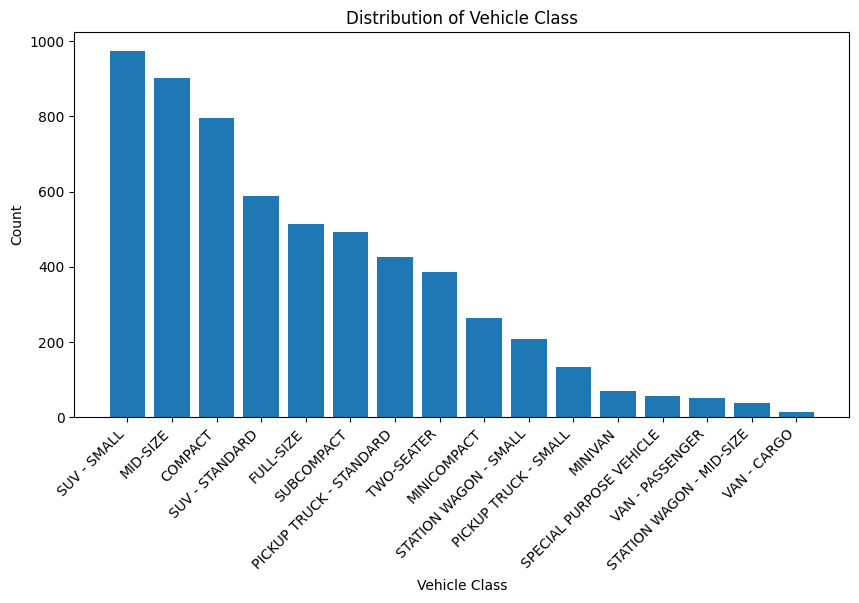

In [120]:
value_counts = train_df['Vehicle Class'].value_counts()
# Showing distribution for Vehicle Class
plt.figure(figsize=(10,5))
plt.bar(value_counts.index, value_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Vehicle Class')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Class')
plt.show()

Compact vehicle class makes up most of the dataset for vehicle class, but this should not be a problem for our Decision Tree or Random Forest Models. If it is a problem in out Multinomial Logit Regreesion Model then the less values will likely be grouped into bins.

Other than that Vehicle class is looking pretty clean. Lets move on to Model.

In [121]:
df['Model'].nunique()

2053

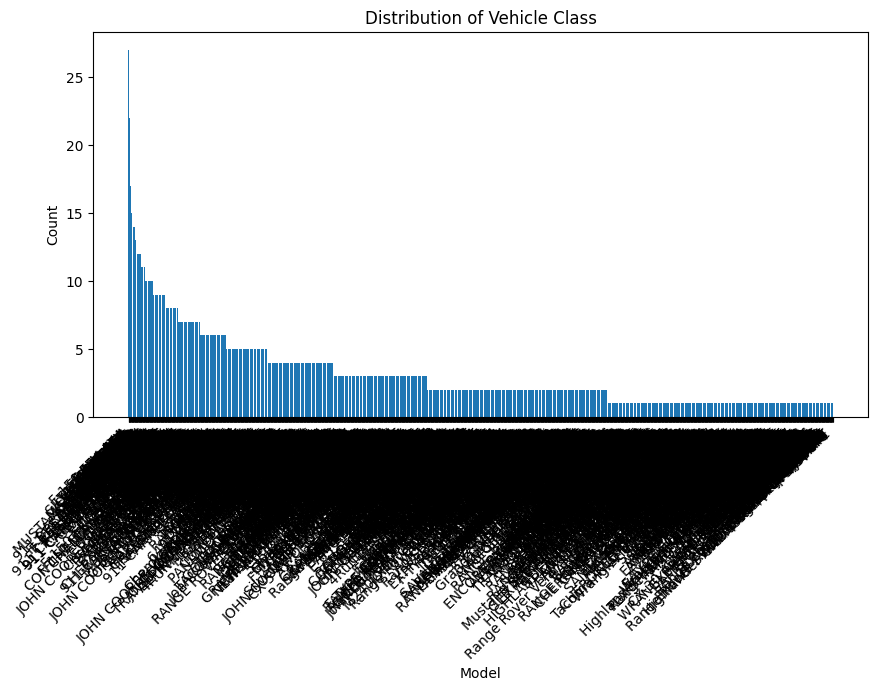

In [122]:
value_counts = train_df['Model'].value_counts()
# Showing distribution for Vehicle Class
plt.figure(figsize=(10,5))
plt.bar(value_counts.index, value_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Class')
plt.show()

Model has many unique variables i.e. high dimemnsionality, which can lead to overfitting. Lets address this using by changing values seen less than 3 times to "other".

In [123]:
train_unique_models = train_df['Model'].value_counts()

# What we do to our training data set we must do to our test data set
test_unique_models = test_df['Model'].value_counts()
train_unique_models

Model
F-150 FFV 4X4                         27
F-150 FFV                             22
MUSTANG                               22
FOCUS FFV                             19
SONIC                                 17
                                      ..
Civic Coupe Si                         1
Highlander AWD (Start/Stop System)     1
Mulsanne                               1
Grand Cherokee 4X4 SRT                 1
TTS COUPE                              1
Name: count, Length: 1921, dtype: int64

In [124]:
avg_model_count = train_unique_models.mean().round()
avg_model_count_te = test_unique_models.mean().round()
print(f'Average amount of times a model is seen in the train dataset: {avg_model_count}')
print(f'Average amount of times a model is seen in the test dataset: {avg_model_count_te}')

Average amount of times a model is seen in the train dataset: 3.0
Average amount of times a model is seen in the test dataset: 2.0


In [125]:
print(f'Number of unique values that show no more than {avg_model_count} times within our train dataset: {train_unique_models[train_unique_models < avg_model_count].count()}')
print(f'Number of unique values that show no more than {avg_model_count_te} times within our test dataset: {test_unique_models[test_unique_models < avg_model_count_te].count()}')

Number of unique values that show no more than 3.0 times within our train dataset: 1106
Number of unique values that show no more than 2.0 times within our test dataset: 658


In [126]:
# Train set variables
# Where you adjust the frequency cutoff for unique values seen in Model
train_low_freq_models_list = train_unique_models[train_unique_models < 10]
train_keep_models_list = train_unique_models[train_unique_models >= 10]
keep_models = train_keep_models_list.index
low_freq_models = train_low_freq_models_list.index

# Test set variables below
test_low_freq_models_list = test_unique_models[test_unique_models < 10]
test_keep_models_list = test_unique_models[test_unique_models >= 10]
keep_models_te = test_keep_models_list.index
low_freq_models_te = test_low_freq_models_list.index

print(f'Number of Model values being changed to \"Other\" in our train dataset: {low_freq_models.nunique()}')
print(f'Number of Model that are retaining their values in our train dataset: {keep_models.nunique()}\n')

print(f'Number of Model values being changed to \"Other\" in our test dataset: {low_freq_models_te.nunique()}')
print(f'Number of Model that are retaining their values in our test dataset: {keep_models_te.nunique()}')


print(f'\nTotal number of Model values being changed to "Other": {low_freq_models.nunique() + low_freq_models_te.nunique()}')
print(f'Total number of Model values being retained: {keep_models.nunique() + keep_models_te.nunique()}')

Number of Model values being changed to "Other" in our train dataset: 1855
Number of Model that are retaining their values in our train dataset: 66

Number of Model values being changed to "Other" in our test dataset: 973
Number of Model that are retaining their values in our test dataset: 1

Total number of Model values being changed to "Other": 2828
Total number of Model values being retained: 67


Lets change models seen less than
 3 times (average amount for a seen vehicle within the dataset) to the value other. 

In [127]:
models = train_df['Model']
train_df2 = train_df.copy()

for model in models:
    if model in low_freq_models:
        train_df2['Model'] = train_df2['Model'].replace(model, 'Other')


print(f'Amount of unique values before: {train_df['Model'].nunique()} and after {train_df2['Model'].nunique()}')
train_df2[train_df2['Model'] == 'Other']

Amount of unique values before: 1921 and after 67


Make  Model             Vehicle Class  Engine Size(L)  Cylinders  \
6590      BMW  Other                SUBCOMPACT             3.0        6.0   
6274   NISSAN  Other      PICKUP TRUCK - SMALL             4.0        6.0   
2251     AUDI  Other                   COMPACT             3.0        6.0   
3149  PORSCHE  Other                TWO-SEATER             3.4        6.0   
4362    VOLVO  Other  STATION WAGON - MID-SIZE             2.0        4.0   
...       ...    ...                       ...             ...        ...   
5191     MINI  Other                SUBCOMPACT             2.0        4.0   
5226   NISSAN  Other                  MID-SIZE             3.5        6.0   
5390   TOYOTA  Other            SUV - STANDARD             3.5        6.0   
860    NISSAN  Other               SUV - SMALL             2.5        4.0   
7270  PORSCHE  Other                 FULL-SIZE             4.0        8.0   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
6590          AS8         Z                              11.4   
6274           A5         X                              14.7   
2251           M6         Z                              13.8   
3149          AM7         Z                              11.3   
4362          AS8         Z                              10.1   
...           ...       ...                               ...   
5191           M6         Z                              10.3   
5226          AV7         X                              10.6   
5390          AS8         X                              11.7   
860            AV         X                               9.5   
7270          AM8         Z                              13.4   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
6590                              8.1                               9.9   
6274                             10.3                              12.7   
2251                              9.0                              11.7   
3149                              7.9                               9.8   
4362                              7.0                               8.7   
...                               ...                               ...   
5191                              7.4                               9.0   
5226                              7.3                               9.1   
5390                              8.8                              10.4   
860                               7.4                               8.6   
7270                             10.1                              11.9   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
6590                         29.0                231.0  
6274                         22.0                299.0  
2251                         24.0                273.0  
3149                         29.0                230.0  
4362                         32.0                204.0  
...                           ...                  ...  
5191                         31.0                210.0  
5226                         31.0                214.0  
5390                         27.0                242.0  
860                          33.0                198.0  
7270                         24.0                279.0  

[5079 rows x 12 columns]

In [128]:
models_te = test_df['Model']
test_df2 = test_df.copy()

for model in models_te:
    if model in low_freq_models:
        test_df2['Model'] = test_df2['Model'].replace(model, 'Other')


print(f'Amount of unique values before: {test_df['Model'].nunique()} and after {test_df2['Model'].nunique()}')
test_df2[test_df2['Model'] == 'Other']

Amount of unique values before: 974 and after 186


Make  Model   Vehicle Class  Engine Size(L)  Cylinders  \
7261        PORSCHE  Other       FULL-SIZE             3.0        6.0   
4489            BMW  Other      SUBCOMPACT             4.4        8.0   
6418         TOYOTA  Other  SUV - STANDARD             4.0        6.0   
3703           FORD  Other      TWO-SEATER             3.5        6.0   
5976         JAGUAR  Other      TWO-SEATER             3.0        6.0   
...             ...    ...             ...             ...        ...   
3733        GENESIS  Other       FULL-SIZE             3.3        6.0   
7185  MERCEDES-BENZ  Other      SUBCOMPACT             2.0        4.0   
1740            KIA  Other     SUV - SMALL             2.0        4.0   
1844  MERCEDES-BENZ  Other        MID-SIZE             3.5        6.0   
5154  MERCEDES-BENZ  Other         COMPACT             2.0        4.0   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
7261          AM8         Z                              12.4   
4489          AM7         Z                              17.3   
6418          AS5         X                              14.3   
3703          AM7         Z                              20.6   
5976          AS8         Z                              11.9   
...           ...       ...                               ...   
3733          AS8         Z                              13.7   
7185           A9         Z                              10.9   
1740          AS6         X                              12.6   
1844          AS7         Z                              11.9   
5154          AM7         Z                               9.6   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
7261                              9.0                              10.9   
4489                             11.6                              14.7   
6418                             11.9                              13.2   
3703                             13.2                              17.3   
5976                              8.5                              10.4   
...                               ...                               ...   
3733                              9.7                              11.9   
7185                              7.7                               9.5   
1740                              9.7                              11.3   
1844                              8.2                              10.2   
5154                              6.6                               8.2   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
7261                         26.0                253.0  
4489                         19.0                344.0  
6418                         21.0                308.0  
3703                         16.0                406.0  
5976                         27.0                242.0  
...                           ...                  ...  
3733                         24.0                279.0  
7185                         30.0                221.0  
1740                         25.0                260.0  
1844                         28.0                235.0  
5154                         34.0                193.0  

[1146 rows x 12 columns]

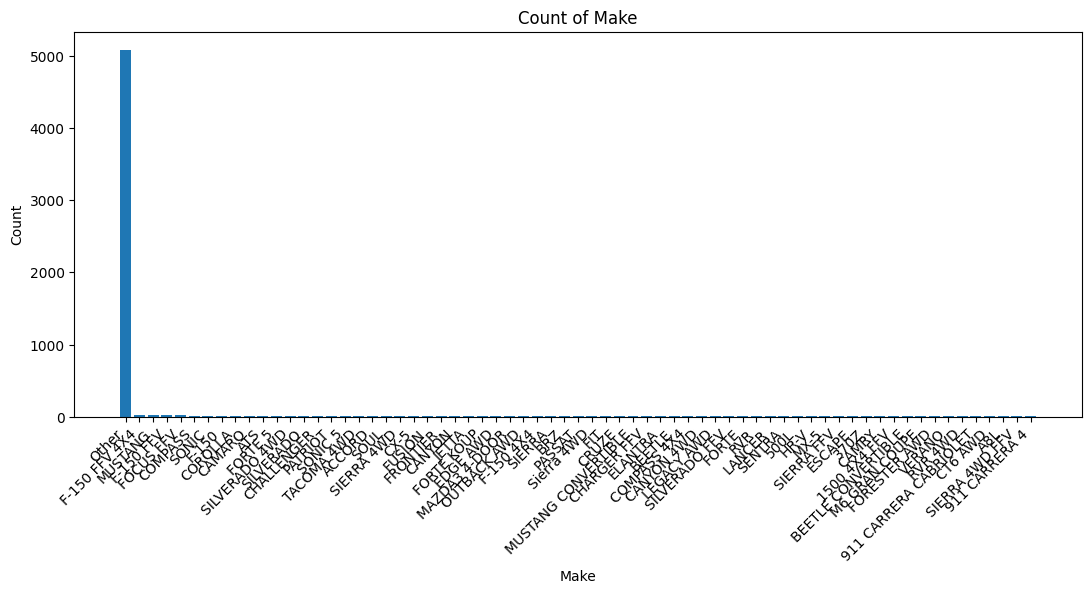

np.int64(67)

In [129]:
value_counts = train_df2['Model'].value_counts()
# Showing distribution for Make
plt.figure(figsize=(13,5))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Make')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Count of Make')
plt.show()

value_counts.count()

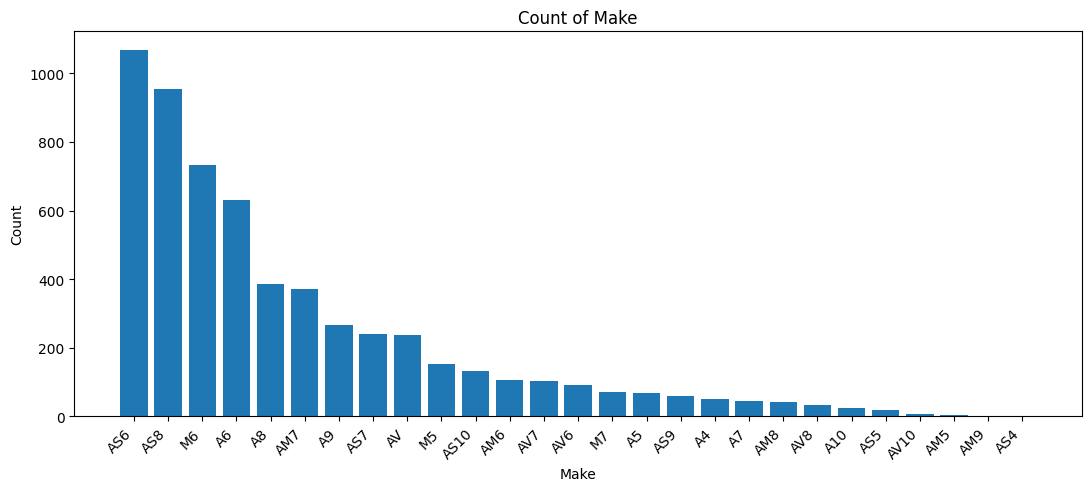

np.int64(27)

In [130]:
value_counts = train_df2['Transmission'].value_counts()
# Showing distribution for Make
plt.figure(figsize=(13,5))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Make')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Count of Make')
plt.show()

value_counts.count()

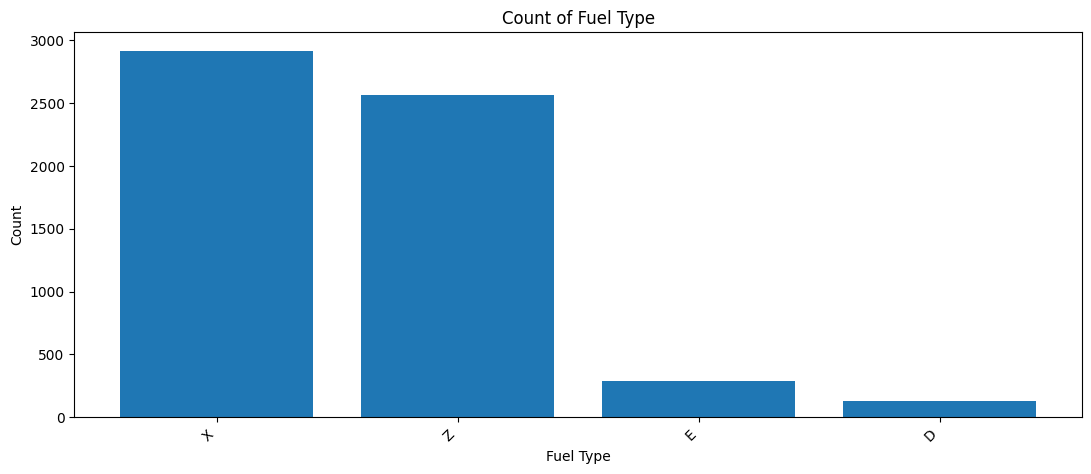

np.int64(4)

In [131]:
value_counts = train_df2['Fuel Type'].value_counts()
# Showing distribution for Make
plt.figure(figsize=(13,5))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Fuel Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Count of Fuel Type')
plt.show()

value_counts.count()

In [132]:
grouped_make = train_df2.groupby(train_df2['Make'])['CO2 Emissions(g/km)'].agg(['mean', 'median', 'count'])


print(grouped_make.sort_values(by=['mean', 'count'], ascending=[True, True]))


                     mean  median  count
Make                                    
SMART          151.428571   150.0      7
HONDA          188.502924   177.0    171
FIAT           193.920635   191.0     63
MAZDA          194.848276   189.0    145
MINI           197.236842   197.0    152
SCION          201.000000   207.0     19
MITSUBISHI     204.354430   207.0     79
HYUNDAI        207.993789   202.0    161
VOLKSWAGEN     208.905063   201.5    158
KIA            214.804598   207.5    174
SUBARU         216.634783   212.0    115
ACURA          222.870370   227.0     54
ALFA ROMEO     225.862069   217.0     29
TOYOTA         226.855513   220.0    263
VOLVO          232.070707   232.0     99
BUICK          233.644444   230.0     90
NISSAN         234.904306   218.0    209
LEXUS          236.371429   244.0    140
JEEP           247.595855   235.0    193
CHRYSLER       249.178082   246.0     73
AUDI           250.914894   241.0    235
BMW            256.323671   246.0    414
INFINITI       2

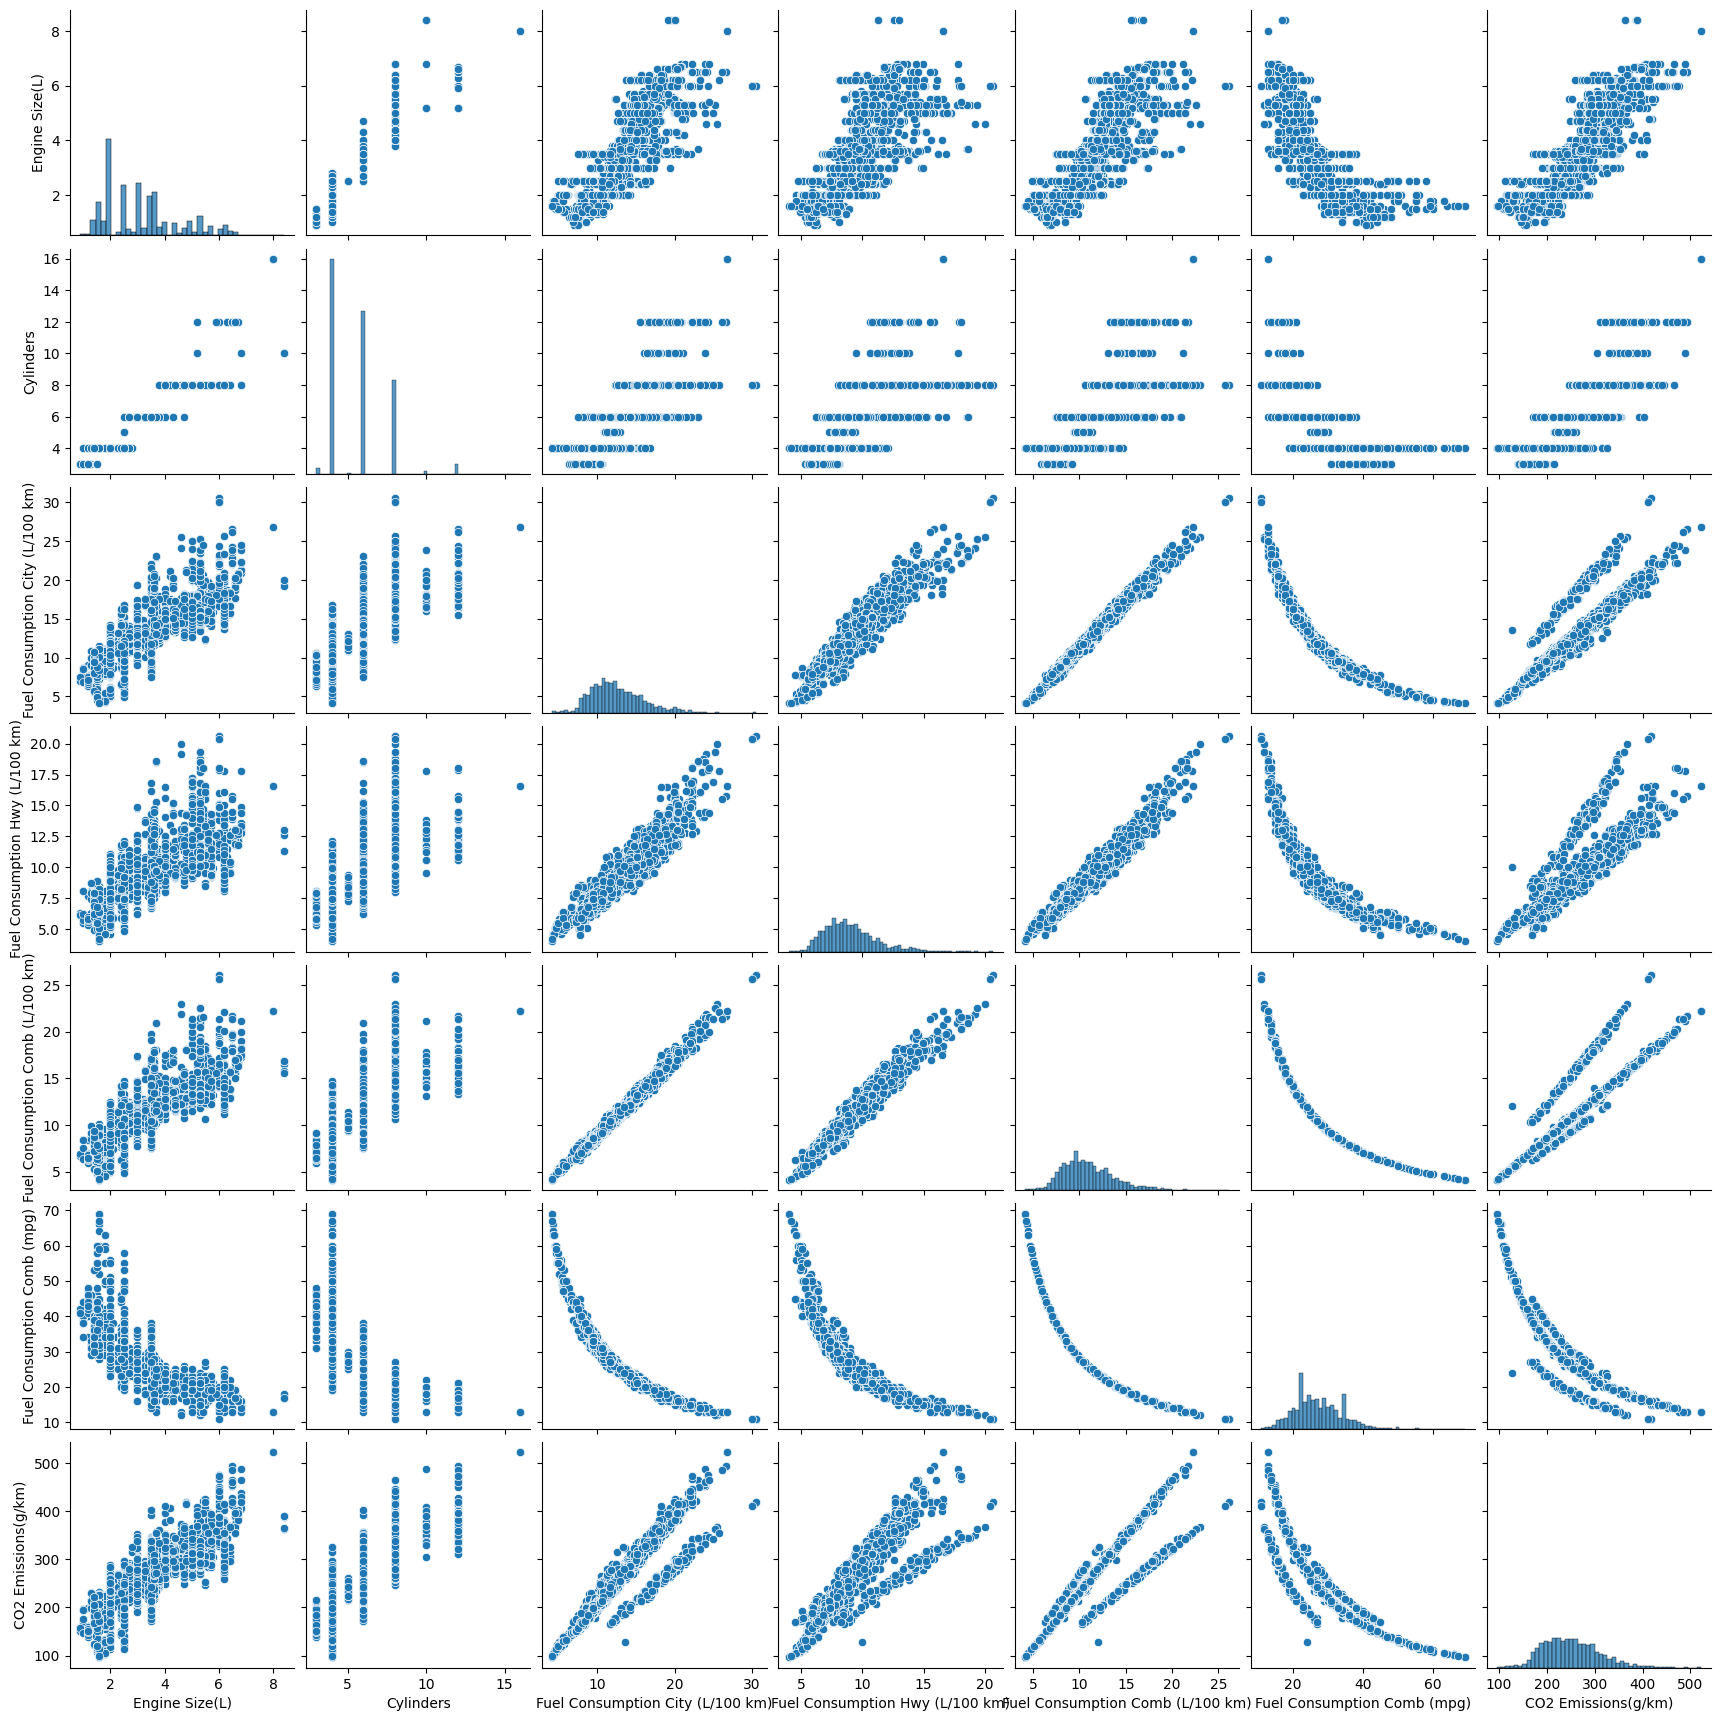

<Figure size 1e+06x1e+06 with 0 Axes>

In [133]:
sns.pairplot(train_df2)
plt.figure(figsize=(10000, 10000))
plt.show()

## Fuel Type

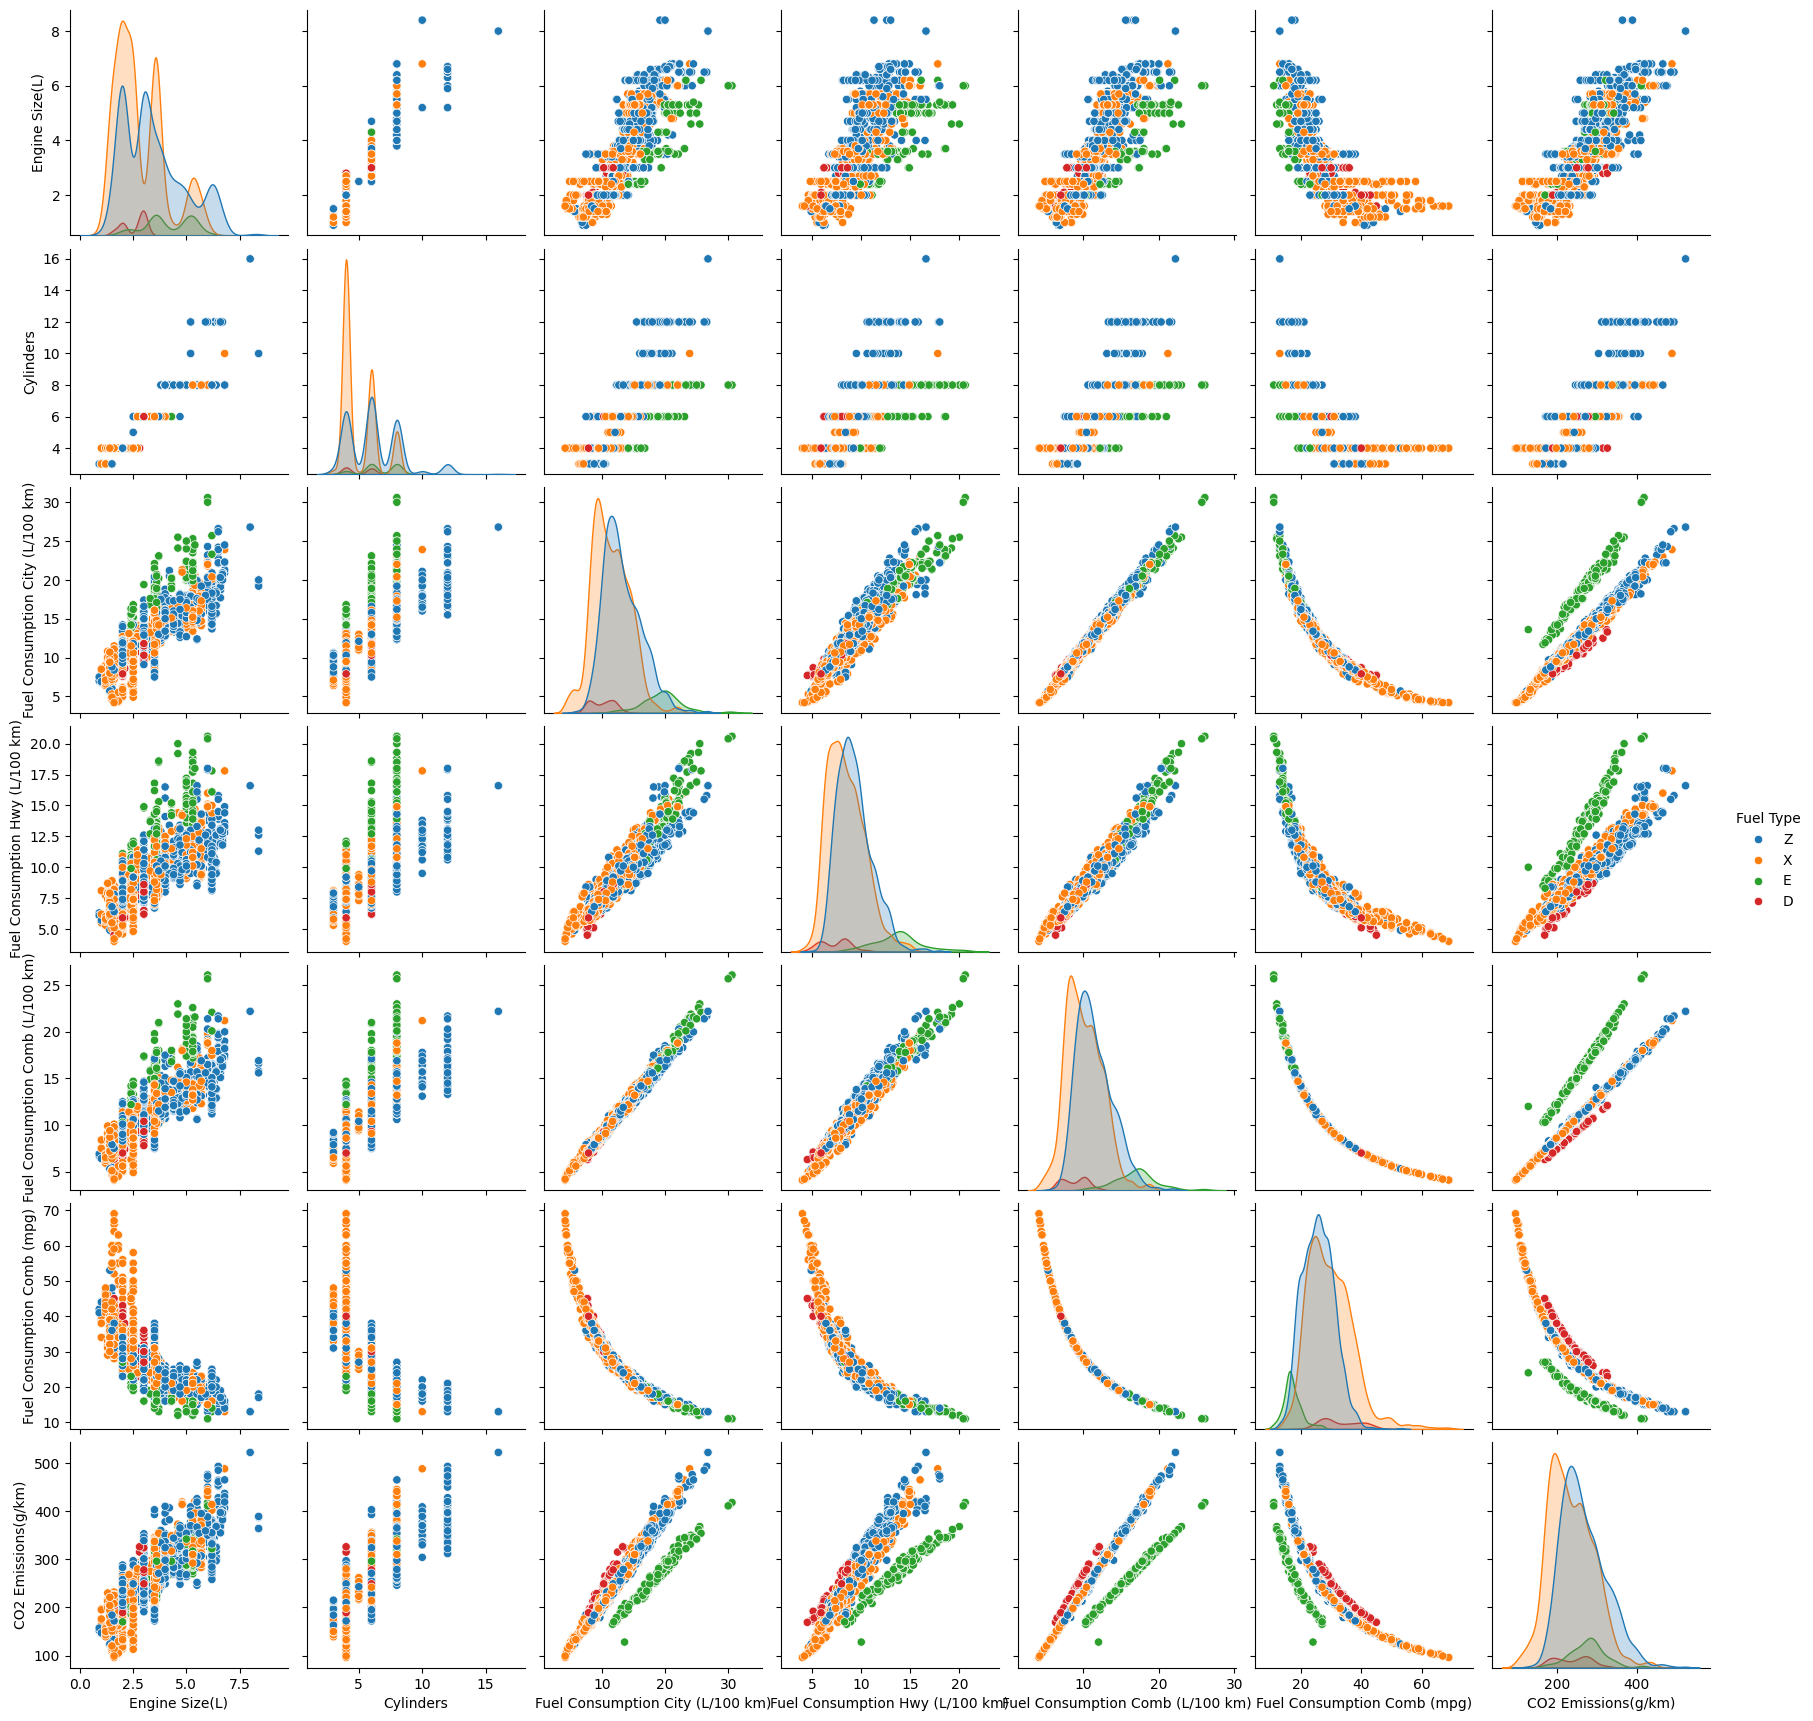

In [134]:
sns.pairplot(train_df2, hue='Fuel Type')
plt.show()

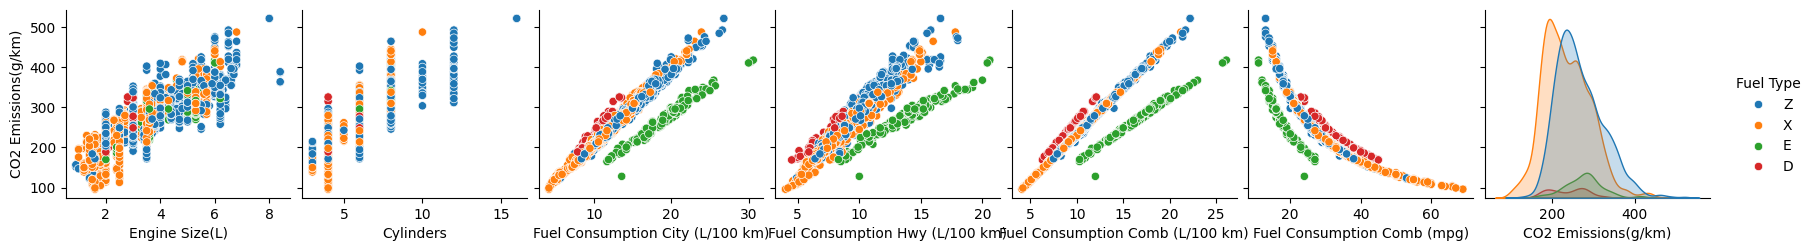

In [135]:
sns.pairplot(train_df2, hue='Fuel Type', y_vars='CO2 Emissions(g/km)')
plt.show()

Strong variations within fuel type. Lets conduct a Welch's ANOVA to confirm statistical significance.

In [136]:
anova = anova_oneway(train_df2['CO2 Emissions(g/km)'], train_df2['Fuel Type'])

gh = pg.pairwise_gameshowell(data = train_df2, dv = 'CO2 Emissions(g/km)', between = 'Fuel Type')

print(f'Anova results:\n{anova}\n \nGames-Howell results:\n{gh}\n')

Anova results:
statistic = 176.85838117437513
pvalue = 1.6287242774761472e-77
df = (3.0, np.float64(486.244581075941))
df_num = 3.0
df_denom = 486.244581075941
nobs_t = 5908.0
n_groups = 4
means = [237.93939394 276.0239726  234.92840014 266.97387914]
nobs = [ 132.  292. 2919. 2565.]
vars_ = [1911.5382836  2168.05096973 3238.63058109 3218.15571369]
use_var = unequal
welch_correction = True
tuple = (np.float64(176.85838117437513), np.float64(1.6287242774761472e-77))
 
Games-Howell results:
   A  B     mean(A)     mean(B)       diff        se          T           df  \
0  D  E  237.939394  276.023973 -38.084579  4.680404  -8.137028   268.047963   
1  D  X  237.939394  234.928400   3.010994  3.948525   0.762562   151.802299   
2  D  Z  237.939394  266.973879 -29.034485  3.966862  -7.319258   154.623286   
3  E  X  276.023973  234.928400  41.095572  2.921358  14.067284   383.612514   
4  E  Z  276.023973  266.973879   9.050093  2.946095   3.071895   396.370522   
5  X  Z  234.928400  266.97

Is_[Fuel Type] columns will be created for fuel types: 'D' and 'E'

In [137]:
grouped_fuel = train_df2.groupby(train_df2['Fuel Type'])[['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']].mean().reset_index()

grouped_fuel


Fuel Type  Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)
0         D                          8.856061           237.939394
1         E                         16.927740           276.023973
2         X                         10.074854           234.928400
3         Z                         11.461637           266.973879

## Cylinders

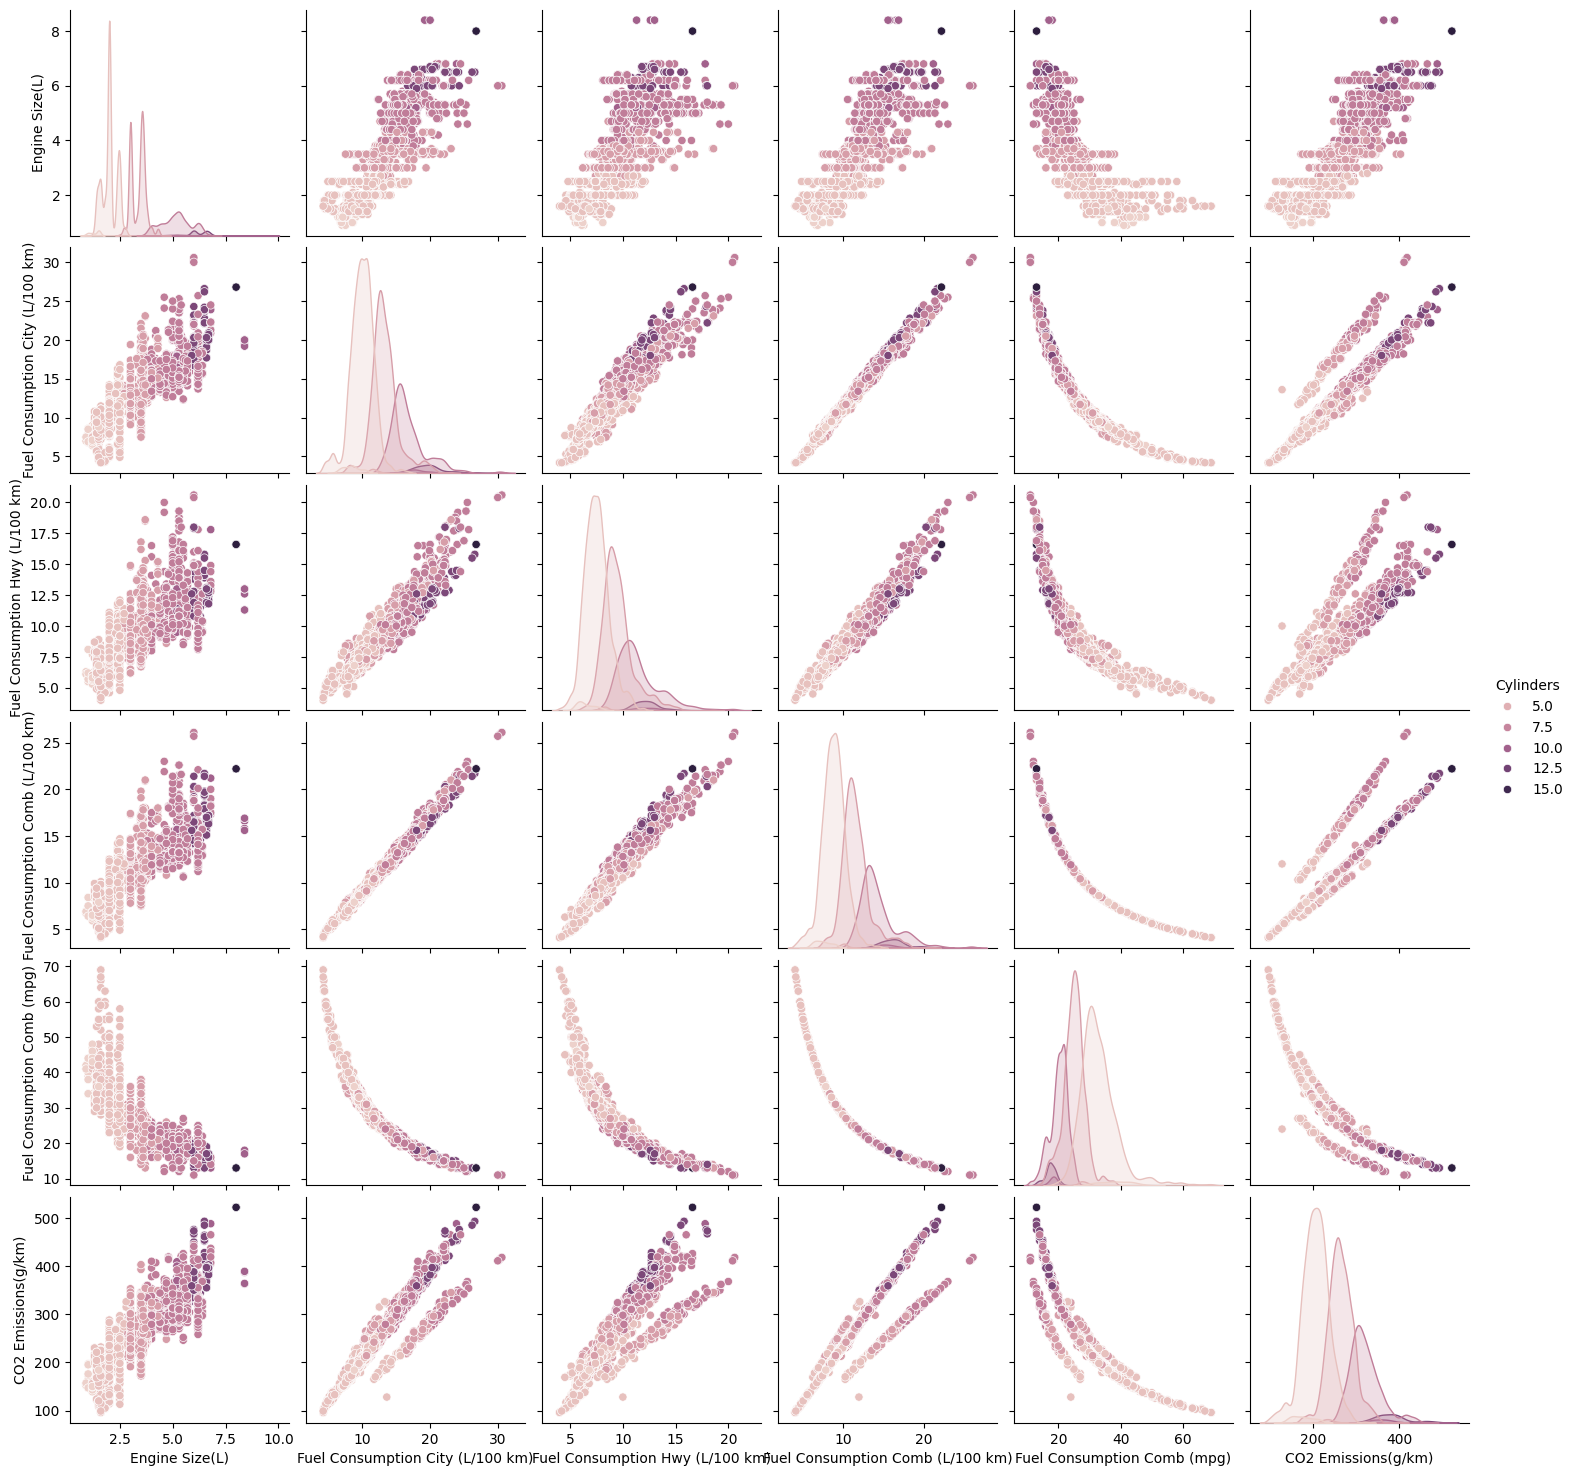

In [138]:
sns.pairplot(train_df2, hue='Cylinders')
plt.show()

In [139]:
anova = anova_oneway(train_df2['CO2 Emissions(g/km)'], train_df2['Cylinders'])

gh = pg.pairwise_gameshowell(data = train_df2, dv = 'CO2 Emissions(g/km)', between = 'Cylinders')

print(f'Anova results:\n{anova}\n \nGames-Howell results:\n{gh}\n')


c:\Users\javen\OneDrive\Desktop\Code\C02Emissions - E2E\.venv\Lib\site-packages\statsmodels\stats\oneway.py:502: RuntimeWarning: divide by zero encountered in divide
  weights = nobs / variances
c:\Users\javen\OneDrive\Desktop\Code\C02Emissions - E2E\.venv\Lib\site-packages\statsmodels\stats\oneway.py:507: RuntimeWarning: invalid value encountered in divide
  w_rel = weights / w_total


Anova results:
statistic = nan
pvalue = nan
df = (7.0, np.float64(nan))
df_num = 7.0
df_denom = nan
nobs_t = 5908.0
n_groups = 8
means = [175.13888889 205.1542946  234.78947368 263.6443536  320.09946714
     361.32432432 382.63636364 522.        ]
nobs = [  72. 2573.   19. 1957. 1126.   37.  121.    3.]
vars_ = [ 553.614241    996.58699263  145.61988304  850.33868615 1265.0532086
      954.94744745 1557.38333333    0.        ]
use_var = unequal
welch_correction = True
tuple = (np.float64(nan), np.float64(nan))
 
Games-Howell results:
       A     B     mean(A)     mean(B)        diff        se           T  \
0    3.0   4.0  175.138889  205.154295  -30.015406  2.841903  -10.561728   
1    3.0   5.0  175.138889  234.789474  -59.650585  3.918328  -15.223481   
2    3.0   6.0  175.138889  263.644354  -88.505465  2.850193  -31.052450   
3    3.0   8.0  175.138889  320.099467 -144.960578  2.968599  -48.831311   
4    3.0  10.0  175.138889  361.324324 -186.185435  5.787787  -32.168675   
5   

A column for Is_[Cylinders > 8] will be created

## Feature Engineering

In [140]:
# What is done to the training set, is done to the test set. *we say in unison* 
train_df3 = train_df2.copy()
test_df3 = test_df2.copy()


In [141]:
train_df3.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [142]:
# Split Transmission on the number
train_df3[['Transmission', 'Gears']] = train_df3['Transmission'].str.extract(r'([A-Za-z]+)(\d+)')

In [143]:
train_df3.isnull().sum()

Make                                  0
Model                                 0
Vehicle Class                         0
Engine Size(L)                        0
Cylinders                             0
Transmission                        238
Fuel Type                             0
Fuel Consumption City (L/100 km)      0
Fuel Consumption Hwy (L/100 km)       0
Fuel Consumption Comb (L/100 km)      0
Fuel Consumption Comb (mpg)           0
CO2 Emissions(g/km)                   0
Gears                               238
dtype: int64

Our transformation introduces null variables. Lets see if we can fix this.

In [144]:
train_df3[train_df3.isnull().any(axis=1)]

Make    Model          Vehicle Class  Engine Size(L)  Cylinders  \
7240  NISSAN    Other            SUV - SMALL             3.5        6.0   
2886   LEXUS    Other                COMPACT             1.8        4.0   
5384  TOYOTA    Other               MID-SIZE             1.8        4.0   
4879   HONDA     HR-V  STATION WAGON - SMALL             1.8        4.0   
577     JEEP  COMPASS            SUV - SMALL             2.0        4.0   
...      ...      ...                    ...             ...        ...   
5393  TOYOTA    Other                COMPACT             1.5        4.0   
3890    JEEP  COMPASS            SUV - SMALL             2.0        4.0   
975   TOYOTA    Other               MID-SIZE             2.5        4.0   
3092  NISSAN    Other            SUV - SMALL             2.5        4.0   
860   NISSAN    Other            SUV - SMALL             2.5        4.0   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
7240          NaN         X                              12.4   
2886          NaN         X                               5.5   
5384          NaN         X                               8.0   
4879          NaN         X                               8.3   
577           NaN         X                              10.7   
...           ...       ...                               ...   
5393          NaN         X                               4.9   
3890          NaN         X                              10.8   
975           NaN         X                               5.5   
3092          NaN         X                               9.5   
860           NaN         X                               9.5   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
7240                              9.2                              11.0   
2886                              5.9                               5.7   
5384                              6.3                               7.2   
4879                              6.9                               7.7   
577                               8.8                               9.9   
...                               ...                               ...   
5393                              5.5                               5.1   
3890                              9.0                              10.0   
975                               5.9                               5.7   
3092                              7.4                               8.6   
860                               7.4                               8.6   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km) Gears  
7240                         26.0                257.0   NaN  
2886                         50.0                132.0   NaN  
5384                         39.0                168.0   NaN  
4879                         37.0                180.0   NaN  
577                          29.0                228.0   NaN  
...                           ...                  ...   ...  
5393                         55.0                120.0   NaN  
3890                         28.0                235.0   NaN  
975                          50.0                131.0   NaN  
3092                         33.0                201.0   NaN  
860                          33.0                198.0   NaN  

[238 rows x 13 columns]

Lets take the row number and examine the record before the change to see what is missing.

In [145]:
train_df3 = train_df2.copy()
test_df3 = test_df2.copy()

train_df3.loc[7240, :]

Make                                     NISSAN
Model                                     Other
Vehicle Class                       SUV - SMALL
Engine Size(L)                              3.5
Cylinders                                   6.0
Transmission                                 AV
Fuel Type                                     X
Fuel Consumption City (L/100 km)           12.4
Fuel Consumption Hwy (L/100 km)             9.2
Fuel Consumption Comb (L/100 km)           11.0
Fuel Consumption Comb (mpg)                26.0
CO2 Emissions(g/km)                       257.0
Name: 7240, dtype: object

In [146]:
train_df3[train_df3['Transmission'] == 'AV'].count()

Make                                238
Model                               238
Vehicle Class                       238
Engine Size(L)                      238
Cylinders                           238
Transmission                        238
Fuel Type                           238
Fuel Consumption City (L/100 km)    238
Fuel Consumption Hwy (L/100 km)     238
Fuel Consumption Comb (L/100 km)    238
Fuel Consumption Comb (mpg)         238
CO2 Emissions(g/km)                 238
dtype: int64

Our problem lies within our regular expression logic, as it is not recognizing 'AV'.

In [147]:
train_df3[['Transmission', 'Gears']] = train_df3['Transmission'].str.extract(r'([A-Za-z]+)([\d]*)')

test_df3[['Transmission', 'Gears']] = test_df3['Transmission'].str.extract(r'([A-Za-z]+)([\d]*)')
train_df3.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
Gears                               0
dtype: int64

In [148]:
train_df3['Gears'] = train_df3['Gears'].replace('', '0')
test_df3['Gears'] = test_df3['Gears'].replace('', '0')
train_df3['Gears'] = train_df3['Gears'].astype(float)
test_df3['Gears'] = test_df3['Gears'].astype(float)
train_df3.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                           float64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)         float64
CO2 Emissions(g/km)                 float64
Gears                               float64
dtype: object

In [149]:
test_df3

Make      Model            Vehicle Class  Engine Size(L)  \
7261        PORSCHE      Other                FULL-SIZE             3.0   
4489            BMW      Other               SUBCOMPACT             4.4   
1539            GMC     SIERRA  PICKUP TRUCK - STANDARD             6.2   
3532      CHEVROLET  SILVERADO  PICKUP TRUCK - STANDARD             5.3   
6418         TOYOTA      Other           SUV - STANDARD             4.0   
...             ...        ...                      ...             ...   
7185  MERCEDES-BENZ      Other               SUBCOMPACT             2.0   
1740            KIA      Other              SUV - SMALL             2.0   
4609      CHEVROLET    SONIC 5    STATION WAGON - SMALL             1.4   
1844  MERCEDES-BENZ      Other                 MID-SIZE             3.5   
5154  MERCEDES-BENZ      Other                  COMPACT             2.0   

      Cylinders Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
7261        6.0           AM         Z                              12.4   
4489        8.0           AM         Z                              17.3   
1539        8.0            A         Z                              16.1   
3532        8.0            A         X                              14.6   
6418        6.0           AS         X                              14.3   
...         ...          ...       ...                               ...   
7185        4.0            A         Z                              10.9   
1740        4.0           AS         X                              12.6   
4609        4.0           AS         X                               8.8   
1844        6.0           AS         Z                              11.9   
5154        4.0           AM         Z                               9.6   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
7261                              9.0                              10.9   
4489                             11.6                              14.7   
1539                             11.4                              14.0   
3532                             10.3                              12.7   
6418                             11.9                              13.2   
...                               ...                               ...   
7185                              7.7                               9.5   
1740                              9.7                              11.3   
4609                              6.6                               7.8   
1844                              8.2                              10.2   
5154                              6.6                               8.2   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Gears  
7261                         26.0                253.0    8.0  
4489                         19.0                344.0    7.0  
1539                         20.0                322.0    8.0  
3532                         22.0                297.0    6.0  
6418                         21.0                308.0    5.0  
...                           ...                  ...    ...  
7185                         30.0                221.0    9.0  
1740                         25.0                260.0    6.0  
4609                         36.0                184.0    6.0  
1844                         28.0                235.0    7.0  
5154                         34.0                193.0    7.0  

[1477 rows x 13 columns]

In [150]:
print(f'Train Null values: \n{train_df3[['Transmission', 'Gears']].isnull().sum()}\n')
print(f'Test Null values: \n{test_df3[['Transmission', 'Gears']].isnull().sum()}\n')

print(f'Train df: \n{train_df3[['Transmission', 'Gears']]}\n')
print(f'Test df: \n{test_df3[['Transmission', 'Gears']]}\n')

Train Null values: 
Transmission    0
Gears           0
dtype: int64

Test Null values: 
Transmission    0
Gears           0
dtype: int64

Train df: 
     Transmission  Gears
6590           AS    8.0
6274            A    5.0
2251            M    6.0
3149           AM    7.0
4362           AS    8.0
...           ...    ...
5191            M    6.0
5226           AV    7.0
5390           AS    8.0
860            AV    0.0
7270           AM    8.0

[5908 rows x 2 columns]

Test df: 
     Transmission  Gears
7261           AM    8.0
4489           AM    7.0
1539            A    8.0
3532            A    6.0
6418           AS    5.0
...           ...    ...
7185            A    9.0
1740           AS    6.0
4609           AS    6.0
1844           AS    7.0
5154           AM    7.0

[1477 rows x 2 columns]



Now lets visualize transmission and fuel type.

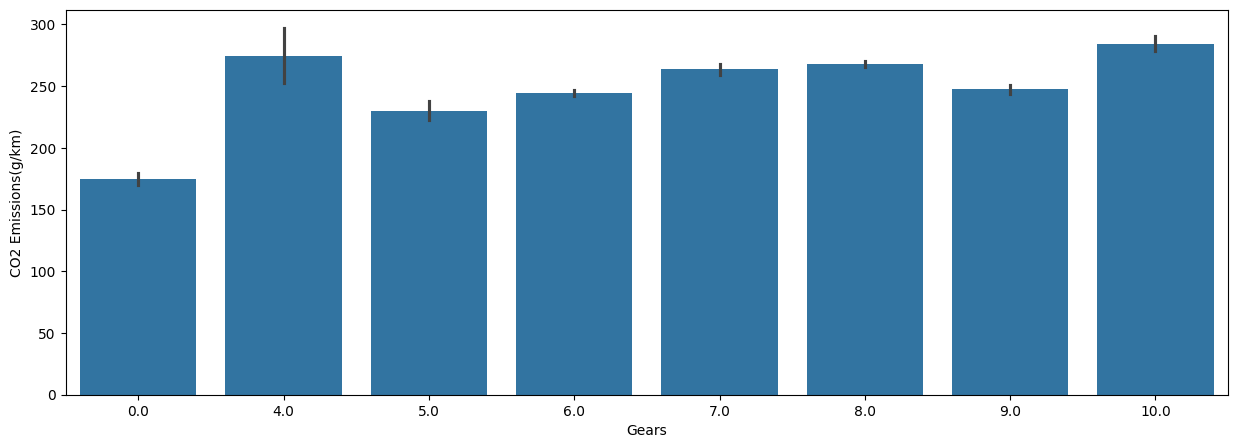

In [151]:
plt.figure(figsize=(15,5))
sns.barplot(data=train_df3, x='Gears', y='CO2 Emissions(g/km)')

plt.show()

In [152]:
train_df3['Gears'].unique()

array([ 8.,  5.,  6.,  7.,  4.,  9.,  0., 10.])

In [153]:
train_df3[train_df3['Gears'] == 0]

Make    Model          Vehicle Class  Engine Size(L)  Cylinders  \
7240  NISSAN    Other            SUV - SMALL             3.5        6.0   
2886   LEXUS    Other                COMPACT             1.8        4.0   
5384  TOYOTA    Other               MID-SIZE             1.8        4.0   
4879   HONDA     HR-V  STATION WAGON - SMALL             1.8        4.0   
577     JEEP  COMPASS            SUV - SMALL             2.0        4.0   
...      ...      ...                    ...             ...        ...   
5393  TOYOTA    Other                COMPACT             1.5        4.0   
3890    JEEP  COMPASS            SUV - SMALL             2.0        4.0   
975   TOYOTA    Other               MID-SIZE             2.5        4.0   
3092  NISSAN    Other            SUV - SMALL             2.5        4.0   
860   NISSAN    Other            SUV - SMALL             2.5        4.0   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
7240           AV         X                              12.4   
2886           AV         X                               5.5   
5384           AV         X                               8.0   
4879           AV         X                               8.3   
577            AV         X                              10.7   
...           ...       ...                               ...   
5393           AV         X                               4.9   
3890           AV         X                              10.8   
975            AV         X                               5.5   
3092           AV         X                               9.5   
860            AV         X                               9.5   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
7240                              9.2                              11.0   
2886                              5.9                               5.7   
5384                              6.3                               7.2   
4879                              6.9                               7.7   
577                               8.8                               9.9   
...                               ...                               ...   
5393                              5.5                               5.1   
3890                              9.0                              10.0   
975                               5.9                               5.7   
3092                              7.4                               8.6   
860                               7.4                               8.6   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Gears  
7240                         26.0                257.0    0.0  
2886                         50.0                132.0    0.0  
5384                         39.0                168.0    0.0  
4879                         37.0                180.0    0.0  
577                          29.0                228.0    0.0  
...                           ...                  ...    ...  
5393                         55.0                120.0    0.0  
3890                         28.0                235.0    0.0  
975                          50.0                131.0    0.0  
3092                         33.0                201.0    0.0  
860                          33.0                198.0    0.0  

[238 rows x 13 columns]

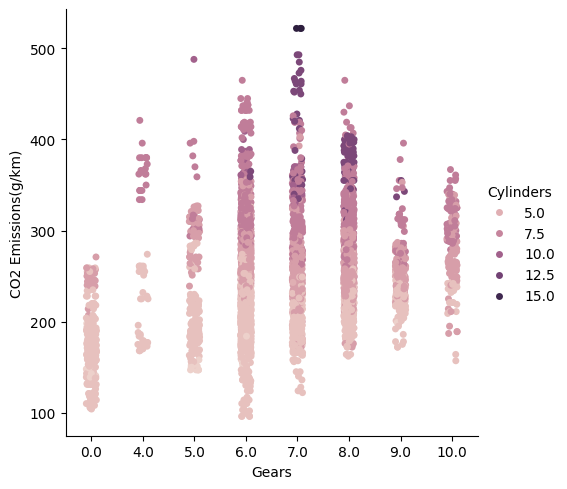

In [154]:

sns.catplot(train_df3, x='Gears', y='CO2 Emissions(g/km)', hue='Cylinders')
plt.show()

In [155]:
train_df3.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                           float64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)         float64
CO2 Emissions(g/km)                 float64
Gears                               float64
dtype: object

In [156]:
train_df3[train_df3['Gears'] == 0].describe()

Engine Size(L)   Cylinders  Fuel Consumption City (L/100 km)  \
count      238.000000  238.000000                        238.000000   
mean         2.061345    4.155462                          8.075630   
std          0.579846    0.613656                          2.109031   
min          1.200000    3.000000                          4.300000   
25%          1.800000    4.000000                          6.600000   
50%          2.000000    4.000000                          8.000000   
75%          2.400000    4.000000                          9.100000   
max          3.500000    6.000000                         13.200000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                       238.000000                        238.000000   
mean                          6.756303                          7.486134   
std                           1.314421                          1.711840   
min                           4.600000                          4.500000   
25%                           5.900000                          6.325000   
50%                           6.300000                          7.200000   
75%                           7.400000                          8.375000   
max                          10.300000                         11.800000   

       Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Gears  
count                   238.000000           238.000000  238.0  
mean                     39.693277           174.533613    0.0  
std                       9.029864            39.648414    0.0  
min                      24.000000           104.000000    0.0  
25%                      34.000000           145.500000    0.0  
50%                      39.000000           168.000000    0.0  
75%                      44.750000           195.500000    0.0  
max                      63.000000           271.000000    0.0

Now that we know the bulk of our missing items came from vehicles with four cylinders on average, we can begin to find the average value to impute or missing values.

In [157]:
train_df3[train_df3['Cylinders'] == 4].describe()

Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
count     2573.000000     2573.0                       2573.000000   
mean         2.003381        4.0                          9.908317   
std          0.343151        0.0                          1.712006   
min          1.000000        4.0                          4.200000   
25%          1.800000        4.0                          8.900000   
50%          2.000000        4.0                         10.000000   
75%          2.300000        4.0                         11.000000   
max          2.800000        4.0                         16.800000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      2573.000000                       2573.000000   
mean                          7.502798                          8.825379   
std                           1.167863                          1.424166   
min                           4.000000                          4.100000   
25%                           6.700000                          8.000000   
50%                           7.400000                          8.800000   
75%                           8.200000                          9.700000   
max                          12.100000                         14.700000   

       Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)        Gears  
count                  2573.000000          2573.000000  2573.000000  
mean                     32.908278           205.154295     5.997668  
std                       6.096373            31.568766     2.078924  
min                      19.000000            96.000000     0.000000  
25%                      29.000000           186.000000     6.000000  
50%                      32.000000           205.000000     6.000000  
75%                      35.000000           225.000000     7.000000  
max                      69.000000           326.000000    10.000000

In this case it will be 6, since that is the average amount of gears seen within vehicles that have four cylinders.

In [158]:
train_df3['Gears'] = train_df3['Gears'].replace(0, 6)
test_df3['Gears'] = test_df3['Gears'].replace(0, 6)

train_df3.loc[7240,]

Make                                     NISSAN
Model                                     Other
Vehicle Class                       SUV - SMALL
Engine Size(L)                              3.5
Cylinders                                   6.0
Transmission                                 AV
Fuel Type                                     X
Fuel Consumption City (L/100 km)           12.4
Fuel Consumption Hwy (L/100 km)             9.2
Fuel Consumption Comb (L/100 km)           11.0
Fuel Consumption Comb (mpg)                26.0
CO2 Emissions(g/km)                       257.0
Gears                                       6.0
Name: 7240, dtype: object

We have successfully created a new feature, and imputed its missing values with that of the average of the most vehicles of the same type that were missing. IE most missing values were of cars that had on average 4 cylinders. So we looked and saw that the average amount of gears for these vehicle were six.

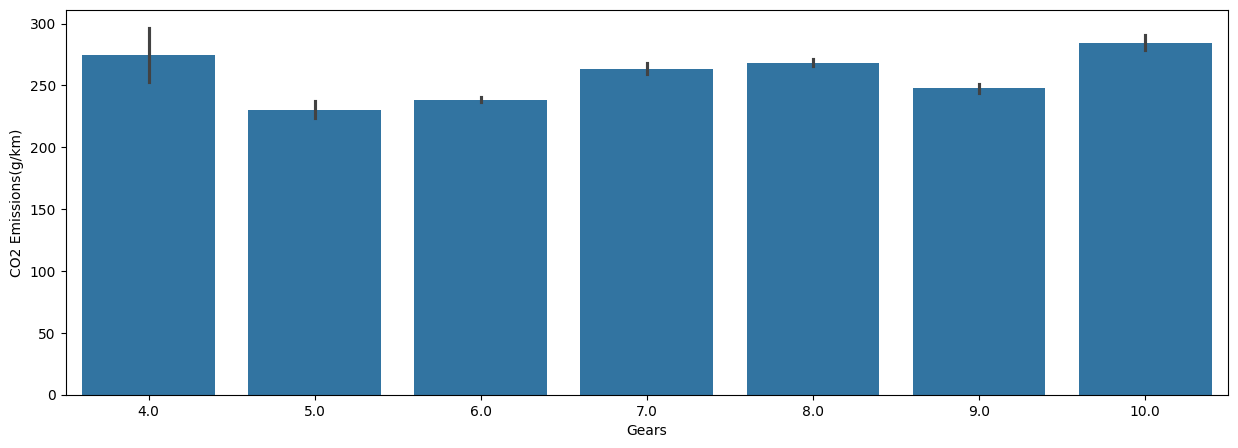

In [159]:
plt.figure(figsize=(15,5))
sns.barplot(data=train_df3, x='Gears', y='CO2 Emissions(g/km)')

plt.show()

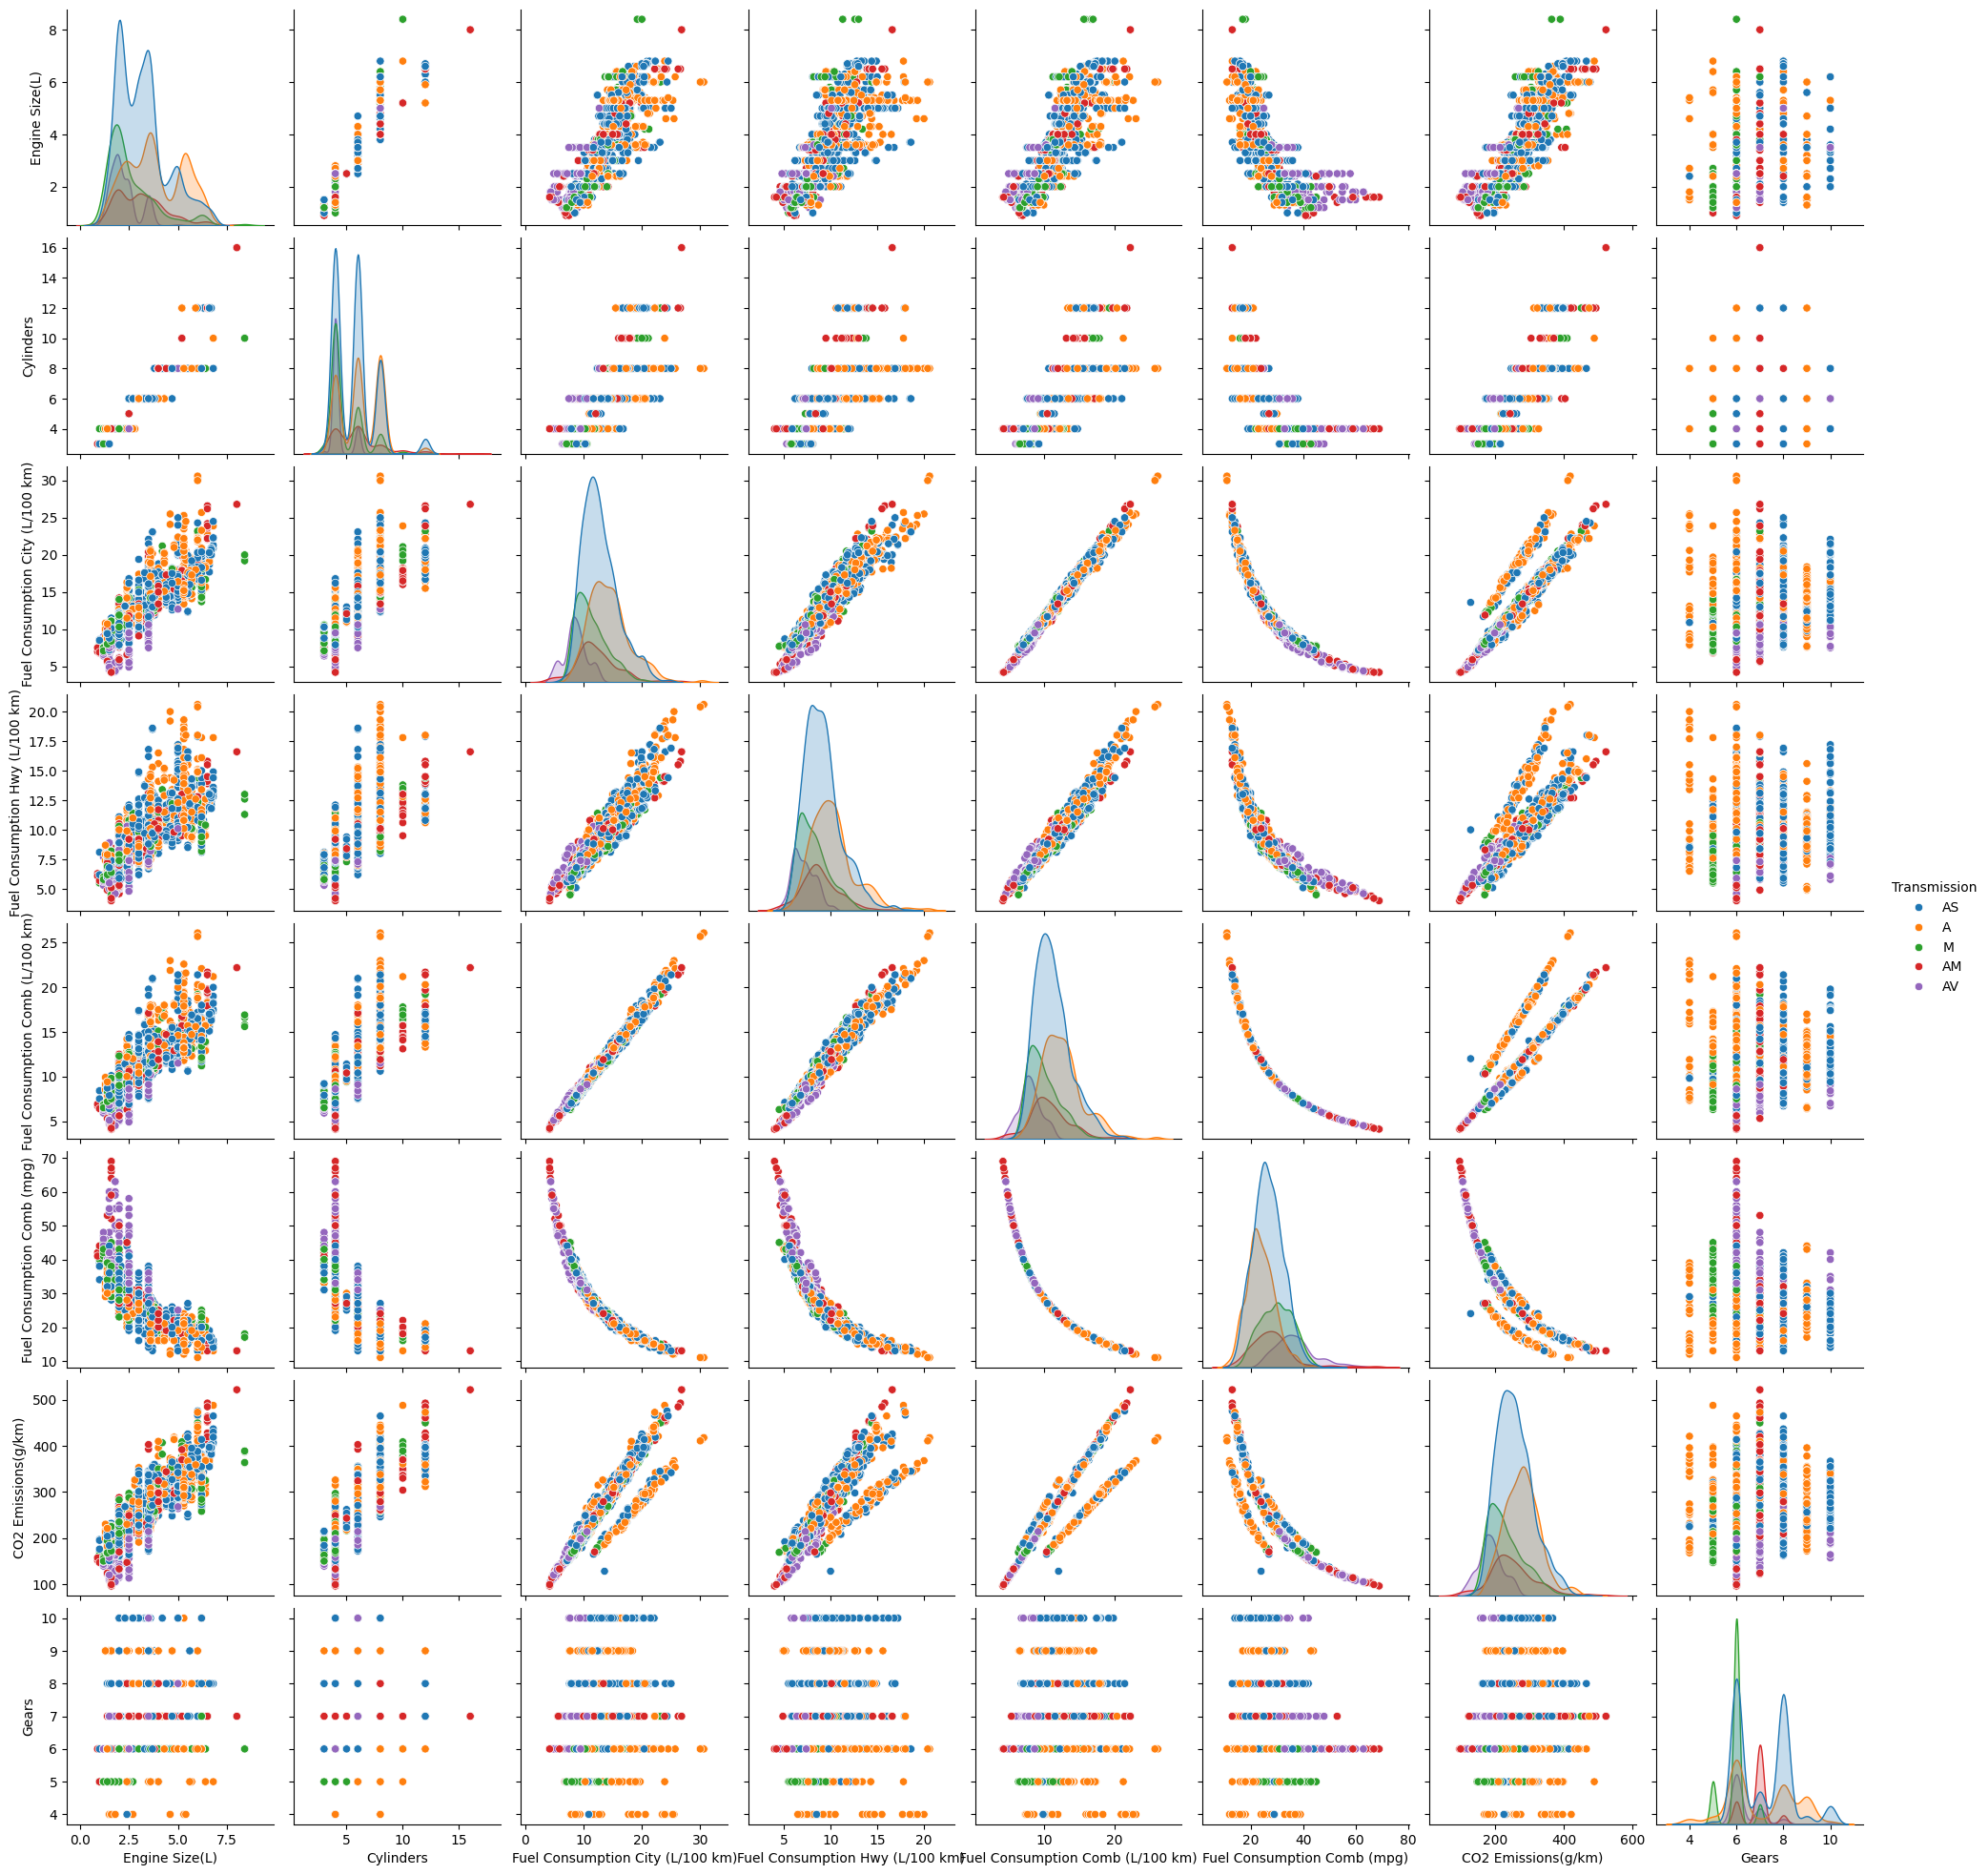

In [160]:
sns.pairplot(train_df3, hue='Transmission')
plt.show()

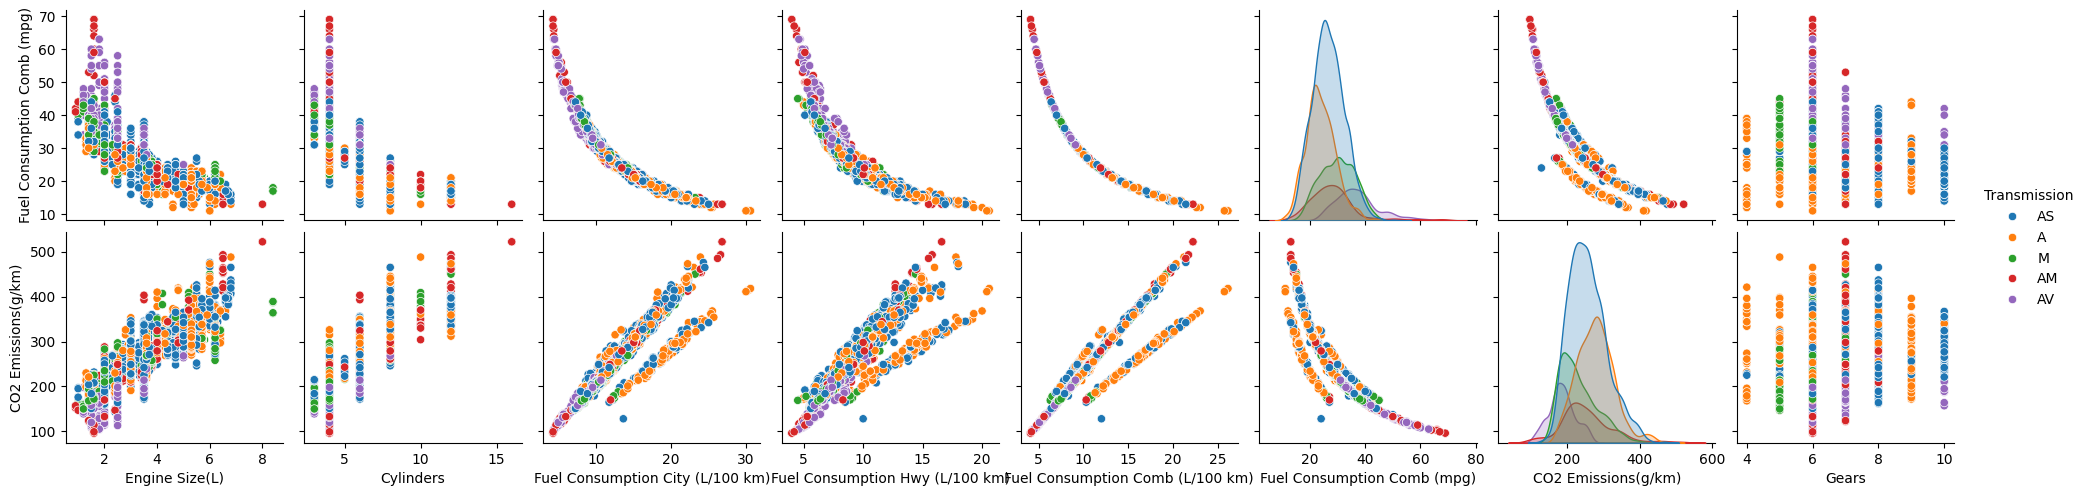

In [161]:
sns.pairplot(train_df3, hue='Transmission', y_vars=['Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'])
plt.show()

In [162]:
anova = anova_oneway(train_df3['CO2 Emissions(g/km)'], train_df3['Transmission'])


gh = pg.pairwise_gameshowell(data = train_df3, dv = 'CO2 Emissions(g/km)', between = 'Transmission')

print(f'Anova results:\n{anova}\n \nGames-Howell results:\n{gh}\n')

Anova results:
statistic = 520.0789180261478
pvalue = 2.5677968801018852e-297
df = (4.0, np.float64(1781.015717096109))
df_num = 4.0
df_denom = 1781.015717096109
nobs_t = 5908.0
n_groups = 5
means = [277.13519022 251.44886364 255.99596286 184.85052632 230.05962343]
nobs = [1472.  528. 2477.  475.  956.]
vars_ = [2661.27810819 4971.85696265 2790.20515332 1301.06410837 2692.76816907]
use_var = unequal
welch_correction = True
tuple = (np.float64(520.0789180261478), np.float64(2.5677968801018852e-297))
 
Games-Howell results:
    A   B     mean(A)     mean(B)       diff        se          T  \
0   A  AM  277.135190  251.448864  25.686327  3.350273   7.666935   
1   A  AS  277.135190  255.995963  21.139227  1.713003  12.340451   
2   A  AV  277.135190  184.850526  92.284664  2.132373  43.277912   
3   A   M  277.135190  230.059623  47.075567  2.150497  21.890554   
4  AM  AS  251.448864  255.995963  -4.547099  3.246974  -1.400411   
5  AM  AV  251.448864  184.850526  66.598337  3.486471  19

 Variables for Is_A and Is_M will be created

In [163]:
tr_kmeans = train_df3.copy()
tr_kmeans['Make'] = tr_kmeans['Make'].astype('category').cat.codes
tr_kmeans['Model'] = tr_kmeans['Model'].astype('category').cat.codes
tr_kmeans['Vehicle Class'] = tr_kmeans['Vehicle Class'].astype('category').cat.codes
tr_kmeans['Transmission'] = tr_kmeans['Transmission'].astype('category').cat.codes
tr_kmeans['Fuel Type'] = tr_kmeans['Fuel Type'].astype('category').cat.codes


tr_kmeans.head()


Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
6590     5     48             10             3.0        6.0             2   
6274    31     48              5             4.0        6.0             0   
2251     3     48              0             3.0        6.0             4   
3149    32     48             13             3.4        6.0             1   
4362    41     48              8             2.0        4.0             2   

      Fuel Type  Fuel Consumption City (L/100 km)  \
6590          3                              11.4   
6274          2                              14.7   
2251          3                              13.8   
3149          3                              11.3   
4362          3                              10.1   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
6590                              8.1                               9.9   
6274                             10.3                              12.7   
2251                              9.0                              11.7   
3149                              7.9                               9.8   
4362                              7.0                               8.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Gears  
6590                         29.0                231.0    8.0  
6274                         22.0                299.0    5.0  
2251                         24.0                273.0    6.0  
3149                         29.0                230.0    7.0  
4362                         32.0                204.0    8.0

In [164]:
features = tr_kmeans.columns.to_list()

x= tr_kmeans[features]

scaler = StandardScaler()
tr_kmeans[features] = scaler.fit_transform(tr_kmeans[features])




In [165]:

tr_kmeans[features]

Make     Model  Vehicle Class  Engine Size(L)  Cylinders  \
6590 -1.285397  0.238654       0.746547       -0.121493   0.205342   
6274  1.006557  0.238654      -0.291241        0.614166   0.205342   
2251 -1.461701  0.238654      -1.329030       -0.121493   0.205342   
3149  1.094709  0.238654       1.369220        0.172770   0.205342   
4362  1.888077  0.238654       0.331432       -0.857153  -0.885139   
...        ...       ...            ...             ...        ...   
5191  0.830253  0.238654       0.746547       -0.857153  -0.885139   
5226  1.006557  0.238654      -0.913914        0.246336   0.205342   
5390  1.711773  0.238654       1.161662        0.246336   0.205342   
860   1.006557  0.238654       0.954105       -0.489323  -0.885139   
7270  1.094709  0.238654      -1.121472        0.614166   1.295823   

      Transmission  Fuel Type  Fuel Consumption City (L/100 km)  \
6590      0.137654   0.975894                         -0.335091   
6274     -1.361445  -0.502840                          0.607277   
2251      1.636753   0.975894                          0.350268   
3149     -0.611895   0.975894                         -0.363647   
4362      0.137654   0.975894                         -0.706327   
...            ...        ...                               ...   
5191      1.636753   0.975894                         -0.649213   
5226      0.887204  -0.502840                         -0.563544   
5390      0.137654  -0.502840                         -0.249421   
860       0.887204  -0.502840                         -0.877666   
7270     -0.611895   0.975894                          0.236042   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
6590                        -0.429379                         -0.376817   
6274                         0.564406                          0.592571   
2251                        -0.022831                          0.246361   
3149                        -0.519723                         -0.411438   
4362                        -0.926271                         -0.792268   
...                               ...                               ...   
5191                        -0.745583                         -0.688405   
5226                        -0.790755                         -0.653784   
5390                        -0.113175                         -0.203712   
860                         -0.745583                         -0.826889   
7270                         0.474062                          0.315603   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)     Gears  
6590                     0.217020            -0.341032  0.974155  
6274                    -0.756204             0.821990 -1.544211  
2251                    -0.478140             0.377305 -0.704756  
3149                     0.217020            -0.358135  0.134699  
4362                     0.634115            -0.802820  0.974155  
...                           ...                  ...       ...  
5191                     0.495083            -0.700200 -0.704756  
5226                     0.495083            -0.631787  0.134699  
5390                    -0.061044            -0.152896  0.974155  
860                      0.773147            -0.905439 -0.704756  
7270                    -0.478140             0.479925  0.974155  

[5908 rows x 13 columns]

In [166]:
train_df4 = train_df3.copy()

In [167]:

n_cluster = 6
for i in range(1, n_cluster):
    kmeans = KMeans(n_clusters=i, random_state=2)
    train_df4[f'Cluster_{i}'] = kmeans.fit_predict(tr_kmeans)

In [168]:
train_df4['Cluster_1'] = train_df4['Cluster_1'].astype(float)
train_df4['Cluster_2'] = train_df4['Cluster_2'].astype(float)
train_df4['Cluster_3'] = train_df4['Cluster_3'].astype(float)
train_df4['Cluster_4'] = train_df4['Cluster_4'].astype(float)
train_df4['Cluster_5'] = train_df4['Cluster_5'].astype(float)


In [169]:
train_df4['Cluster_2'].describe()

count    5908.000000
mean        0.405552
std         0.491040
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Cluster_2, dtype: float64

In [170]:
# Display the DataFrame with cluster labels
train_df4.head()

Make  Model             Vehicle Class  Engine Size(L)  Cylinders  \
6590      BMW  Other                SUBCOMPACT             3.0        6.0   
6274   NISSAN  Other      PICKUP TRUCK - SMALL             4.0        6.0   
2251     AUDI  Other                   COMPACT             3.0        6.0   
3149  PORSCHE  Other                TWO-SEATER             3.4        6.0   
4362    VOLVO  Other  STATION WAGON - MID-SIZE             2.0        4.0   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
6590           AS         Z                              11.4   
6274            A         X                              14.7   
2251            M         Z                              13.8   
3149           AM         Z                              11.3   
4362           AS         Z                              10.1   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
6590                              8.1                               9.9   
6274                             10.3                              12.7   
2251                              9.0                              11.7   
3149                              7.9                               9.8   
4362                              7.0                               8.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Gears  Cluster_1  \
6590                         29.0                231.0    8.0        0.0   
6274                         22.0                299.0    5.0        0.0   
2251                         24.0                273.0    6.0        0.0   
3149                         29.0                230.0    7.0        0.0   
4362                         32.0                204.0    8.0        0.0   

      Cluster_2  Cluster_3  Cluster_4  Cluster_5  
6590        0.0        2.0        2.0        2.0  
6274        1.0        2.0        3.0        3.0  
2251        0.0        2.0        3.0        2.0  
3149        0.0        2.0        2.0        4.0  
4362        0.0        0.0        0.0        4.0

In [ ]:
te_kmeans = test_df3.copy()
te_kmeans['Make'] = te_kmeans['Make'].astype('category').cat.codes
te_kmeans['Model'] = te_kmeans['Model'].astype('category').cat.codes
te_kmeans['Vehicle Class'] = te_kmeans['Vehicle Class'].astype('category').cat.codes
te_kmeans['Transmission'] = te_kmeans['Transmission'].astype('category').cat.codes
te_kmeans['Fuel Type'] = te_kmeans['Fuel Type'].astype('category').cat.codes


te_kmeans.head()


features = te_kmeans.columns.to_list()

x = te_kmeans[features]

scaler = StandardScaler()
te_kmeans[features] = scaler.fit_transform(te_kmeans[features])

te_kmeans[features]

Make     Model  Vehicle Class  Engine Size(L)  Cylinders  \
7261  1.181834  0.293848      -1.076807       -0.104857   0.231922   
4489 -1.267029  0.293848       0.783361        0.945643   1.340495   
1539 -0.419346  1.094804      -0.043380        2.296287   1.340495   
3532 -0.984468  1.234101      -0.043380        1.620965   1.340495   
6418  1.652769  0.293848       1.196732        0.645500   0.231922   
...        ...       ...            ...             ...        ...   
7185  0.805085  0.293848       0.783361       -0.855214  -0.876651   
1740  0.145776  0.293848       0.990046       -0.855214  -0.876651   
4609 -0.984468  1.373398       0.576676       -1.305429  -0.876651   
1844  0.805085  0.293848      -0.870121        0.270322   0.231922   
5154  0.805085  0.293848      -1.283492       -0.855214  -0.876651   

      Transmission  Fuel Type  Fuel Consumption City (L/100 km)  \
7261     -0.593893   0.827506                         -0.025476   
4489     -0.593893   0.827506                          1.377693   
1539     -1.350084   0.827506                          1.034060   
3532     -1.350084  -0.257952                          0.604518   
6418      0.162297  -0.257952                          0.518610   
...            ...        ...                               ...   
7185     -1.350084   0.827506                         -0.455017   
1740      0.162297  -0.257952                          0.031796   
4609      0.162297  -0.257952                         -1.056376   
1844      0.162297   0.827506                         -0.168656   
5154     -0.593893   0.827506                         -0.827287   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
7261                        -0.002809                         -0.007476   
4489                         1.144762                          1.299625   
1539                         1.056488                          1.058843   
3532                         0.570977                          0.611677   
6418                         1.277174                          0.783664   
...                               ...                               ...   
7185                        -0.576595                         -0.489039   
1740                         0.306153                          0.130114   
4609                        -1.062106                         -1.073794   
1844                        -0.355908                         -0.248257   
5154                        -1.062106                         -0.936205   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)     Gears  
7261                    -0.223785             0.065386  0.902815  
4489                    -1.172028             1.617007  0.083738  
1539                    -1.036565             1.241890  0.902815  
3532                    -0.765638             0.815621 -0.735339  
6418                    -0.901101             1.003179 -1.554416  
...                           ...                  ...       ...  
7185                     0.318068            -0.480239  1.721892  
1740                    -0.359248             0.184742 -0.735339  
4609                     1.130848            -1.111118 -0.735339  
1844                     0.047142            -0.241528  0.083738  
5154                     0.859921            -0.957661  0.083738  

[1477 rows x 13 columns]

In [172]:

test_df4 = test_df3.copy()


n_cluster = 6
for i in range(1, n_cluster):
    kmeans = KMeans(n_clusters=i, random_state=2)
    test_df4[f'Cluster_{i}'] = kmeans.fit_predict(te_kmeans)

test_df4['Cluster_1'] = test_df4['Cluster_1'].astype(float)
test_df4['Cluster_2'] = test_df4['Cluster_2'].astype(float)
test_df4['Cluster_3'] = test_df4['Cluster_3'].astype(float)
test_df4['Cluster_4'] = test_df4['Cluster_4'].astype(float)
test_df4['Cluster_5'] = test_df4['Cluster_5'].astype(float)

In [173]:
test_df4.head()

Make      Model            Vehicle Class  Engine Size(L)  \
7261    PORSCHE      Other                FULL-SIZE             3.0   
4489        BMW      Other               SUBCOMPACT             4.4   
1539        GMC     SIERRA  PICKUP TRUCK - STANDARD             6.2   
3532  CHEVROLET  SILVERADO  PICKUP TRUCK - STANDARD             5.3   
6418     TOYOTA      Other           SUV - STANDARD             4.0   

      Cylinders Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
7261        6.0           AM         Z                              12.4   
4489        8.0           AM         Z                              17.3   
1539        8.0            A         Z                              16.1   
3532        8.0            A         X                              14.6   
6418        6.0           AS         X                              14.3   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
7261                              9.0                              10.9   
4489                             11.6                              14.7   
1539                             11.4                              14.0   
3532                             10.3                              12.7   
6418                             11.9                              13.2   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Gears  Cluster_1  \
7261                         26.0                253.0    8.0        0.0   
4489                         19.0                344.0    7.0        0.0   
1539                         20.0                322.0    8.0        0.0   
3532                         22.0                297.0    6.0        0.0   
6418                         21.0                308.0    5.0        0.0   

      Cluster_2  Cluster_3  Cluster_4  Cluster_5  
7261        0.0        0.0        0.0        0.0  
4489        1.0        2.0        2.0        2.0  
1539        1.0        2.0        2.0        2.0  
3532        1.0        2.0        2.0        2.0  
6418        1.0        2.0        2.0        0.0

<Figure size 10000x10000 with 0 Axes>

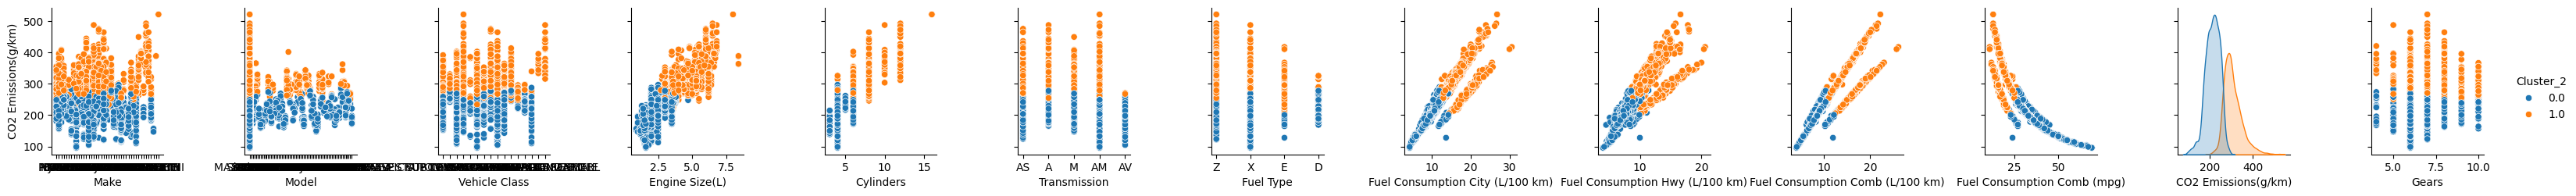

In [174]:
# Plot the clusters
plt.figure(figsize=(100,100))
sns.pairplot(train_df4, hue = 'Cluster_2', y_vars = 'CO2 Emissions(g/km)', x_vars=features)
plt.show()



In [207]:
train_df4[train_df4['Cluster_3'] == 2].describe()

Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     2602.000000  2602.000000                       2602.000000   
mean         3.011107     5.462337                         12.473444   
std          0.672617     1.067648                          1.332560   
min          1.300000     3.000000                          8.400000   
25%          2.400000     4.000000                         11.500000   
50%          3.000000     6.000000                         12.400000   
75%          3.600000     6.000000                         13.400000   
max          6.200000     8.000000                         17.100000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      2602.000000                       2602.000000   
mean                          8.986818                         10.905419   
std                           0.932863                          1.088935   
min                           6.700000                          8.000000   
25%                           8.300000                         10.100000   
50%                           8.900000                         10.900000   
75%                           9.600000                         11.700000   
max                          12.100000                         14.700000   

       Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)        Gears  \
count                  2602.000000          2602.000000  2602.000000   
mean                     26.153728           253.695619     7.255573   
std                       2.630413            25.138761     1.212051   
min                      19.000000           128.000000     4.000000   
25%                      24.000000           235.000000     6.000000   
50%                      26.000000           253.000000     7.000000   
75%                      28.000000           273.000000     8.000000   
max                      35.000000           326.000000    10.000000   

       Cluster_1    Cluster_2  Cluster_3    Cluster_4    Cluster_5  
count     2602.0  2602.000000     2602.0  2602.000000  2602.000000  
mean         0.0     0.380861        2.0     2.382398     2.576864  
std          0.0     0.485692        0.0     0.493913     0.898358  
min          0.0     0.000000        2.0     0.000000     0.000000  
25%          0.0     0.000000        2.0     2.000000     2.000000  
50%          0.0     0.000000        2.0     2.000000     2.000000  
75%          0.0     1.000000        2.0     3.000000     4.000000  
max          0.0     1.000000        2.0     3.000000     4.000000

In [176]:
trainf = train_df4.copy()
testf = test_df4.copy()

In [177]:
# Create cylinders greater than 8 column
trainf['Cylinders >= 8'] = trainf['Cylinders'].apply(lambda x: 1 if x >= 8.0 else 0)
testf['Cylinders >= 8'] = testf['Cylinders'].apply(lambda x: 1 if x >= 8.0 else 0)

In [178]:
# Create columns for fuel type ethanol and diesel
trainf['Is_Fuel_Type_E'] = trainf['Fuel Type'].apply(lambda x: 1 if x == 'E' else 0)
testf['Is_Fuel_Type_E'] = testf['Fuel Type'].apply(lambda x: 1 if x == 'E' else 0)

trainf['Is_Fuel_Type_D'] = trainf['Fuel Type'].apply(lambda x: 1 if x == 'D' else 0)
testf['Is_Fuel_Type_D'] = testf['Fuel Type'].apply(lambda x: 1 if x == 'D' else 0)

In [179]:
# Create columns for automatic or manual transimission
trainf['Is_Transmission_M'] = trainf['Transmission'].apply(lambda x: 1 if x == 'M' else 0)
testf['Is_Transmission_M'] = trainf['Transmission'].apply(lambda x: 1 if x == 'M' else 0)

trainf['Is_Transmission_A'] = trainf['Transmission'].apply(lambda x: 1 if x == 'A' else 0)
testf['Is_Transmission_A'] = testf['Transmission'].apply(lambda x: 1 if x == 'A' else 0)

In [180]:
testf.head()

Make      Model            Vehicle Class  Engine Size(L)  \
7261    PORSCHE      Other                FULL-SIZE             3.0   
4489        BMW      Other               SUBCOMPACT             4.4   
1539        GMC     SIERRA  PICKUP TRUCK - STANDARD             6.2   
3532  CHEVROLET  SILVERADO  PICKUP TRUCK - STANDARD             5.3   
6418     TOYOTA      Other           SUV - STANDARD             4.0   

      Cylinders Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
7261        6.0           AM         Z                              12.4   
4489        8.0           AM         Z                              17.3   
1539        8.0            A         Z                              16.1   
3532        8.0            A         X                              14.6   
6418        6.0           AS         X                              14.3   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  ...  \
7261                              9.0                              10.9  ...   
4489                             11.6                              14.7  ...   
1539                             11.4                              14.0  ...   
3532                             10.3                              12.7  ...   
6418                             11.9                              13.2  ...   

      Cluster_1  Cluster_2  Cluster_3  Cluster_4  Cluster_5  Cylinders >= 8  \
7261        0.0        0.0        0.0        0.0        0.0               0   
4489        0.0        1.0        2.0        2.0        2.0               1   
1539        0.0        1.0        2.0        2.0        2.0               1   
3532        0.0        1.0        2.0        2.0        2.0               1   
6418        0.0        1.0        2.0        2.0        0.0               0   

      Is_Fuel_Type_E  Is_Fuel_Type_D  Is_Transmission_M  Is_Transmission_A  
7261               0               0                NaN                  0  
4489               0               0                NaN                  0  
1539               0               0                NaN                  1  
3532               0               0                NaN                  1  
6418               0               0                NaN                  0  

[5 rows x 23 columns]

In [181]:
trainf.head()

Make  Model             Vehicle Class  Engine Size(L)  Cylinders  \
6590      BMW  Other                SUBCOMPACT             3.0        6.0   
6274   NISSAN  Other      PICKUP TRUCK - SMALL             4.0        6.0   
2251     AUDI  Other                   COMPACT             3.0        6.0   
3149  PORSCHE  Other                TWO-SEATER             3.4        6.0   
4362    VOLVO  Other  STATION WAGON - MID-SIZE             2.0        4.0   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
6590           AS         Z                              11.4   
6274            A         X                              14.7   
2251            M         Z                              13.8   
3149           AM         Z                              11.3   
4362           AS         Z                              10.1   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  ...  \
6590                              8.1                               9.9  ...   
6274                             10.3                              12.7  ...   
2251                              9.0                              11.7  ...   
3149                              7.9                               9.8  ...   
4362                              7.0                               8.7  ...   

      Cluster_1  Cluster_2  Cluster_3  Cluster_4  Cluster_5  Cylinders >= 8  \
6590        0.0        0.0        2.0        2.0        2.0               0   
6274        0.0        1.0        2.0        3.0        3.0               0   
2251        0.0        0.0        2.0        3.0        2.0               0   
3149        0.0        0.0        2.0        2.0        4.0               0   
4362        0.0        0.0        0.0        0.0        4.0               0   

      Is_Fuel_Type_E  Is_Fuel_Type_D  Is_Transmission_M  Is_Transmission_A  
6590               0               0                  0                  0  
6274               0               0                  0                  1  
2251               0               0                  1                  0  
3149               0               0                  0                  0  
4362               0               0                  0                  0  

[5 rows x 23 columns]

In [182]:
trainf[trainf['Is_Transmission_M'] == 1]

Make   Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
2251       AUDI   Other       COMPACT             3.0        6.0            M   
4772       FORD   Other      MID-SIZE             2.3        4.0            M   
6578        BMW   Other       COMPACT             3.0        6.0            M   
57         AUDI   Other       COMPACT             3.0        6.0            M   
2726    HYUNDAI   Other       COMPACT             1.6        4.0            M   
...         ...     ...           ...             ...        ...          ...   
1899       MINI   Other    TWO-SEATER             1.6        4.0            M   
189   CHEVROLET  CAMARO       COMPACT             3.6        6.0            M   
2558       FIAT   Other   SUV - SMALL             1.4        4.0            M   
5611  CHEVROLET   Other    SUBCOMPACT             2.0        4.0            M   
5191       MINI   Other    SUBCOMPACT             2.0        4.0            M   

     Fuel Type  Fuel Consumption City (L/100 km)  \
2251         Z                              13.8   
4772         Z                              12.2   
6578         Z                              13.0   
57           Z                              14.6   
2726         X                               8.7   
...        ...                               ...   
1899         Z                               8.4   
189          X                              14.2   
2558         X                               9.5   
5611         Z                              11.9   
5191         Z                              10.3   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  ...  \
2251                              9.0                              11.7  ...   
4772                              9.0                              10.8  ...   
6578                              8.5                              11.0  ...   
57                                9.8                              12.4  ...   
2726                              6.3                               7.6  ...   
...                               ...                               ...  ...   
1899                              6.4                               7.5  ...   
189                               8.6                              11.7  ...   
2558                              6.9                               8.3  ...   
5611                              7.9                              10.1  ...   
5191                              7.4                               9.0  ...   

      Cluster_1  Cluster_2  Cluster_3  Cluster_4  Cluster_5  Cylinders >= 8  \
2251        0.0        0.0        2.0        3.0        2.0               0   
4772        0.0        0.0        2.0        3.0        2.0               0   
6578        0.0        0.0        2.0        3.0        2.0               0   
57          0.0        1.0        2.0        3.0        2.0               0   
2726        0.0        0.0        0.0        0.0        0.0               0   
...         ...        ...        ...        ...        ...             ...   
1899        0.0        0.0        0.0        0.0        0.0               0   
189         0.0        0.0        2.0        3.0        2.0               0   
2558        0.0        0.0        0.0        0.0        4.0               0   
5611        0.0        0.0        2.0        3.0        4.0               0   
5191        0.0        0.0        0.0        0.0        4.0               0   

      Is_Fuel_Type_E  Is_Fuel_Type_D  Is_Transmission_M  Is_Transmission_A  
2251               0               0                  1                  0  
4772               0               0                  1                  0  
6578               0               0                  1                  0  
57                 0               0                  1                  0  
2726               0               0                  1                  0  
...              ...             ...     

In [ ]:
# Code to scale dataset for correlation map
trf_corr = trainf.copy()
trf_corr['Make'] = trf_corr['Make'].astype('category').cat.codes
trf_corr['Model'] = trf_corr['Model'].astype('category').cat.codes
trf_corr['Vehicle Class'] = trf_corr['Vehicle Class'].astype('category').cat.codes
trf_corr['Transmission'] = trf_corr['Transmission'].astype('category').cat.codes
trf_corr['Fuel Type'] = trf_corr['Fuel Type'].astype('category').cat.codes

trf_corr.head()


features = trf_corr.columns.to_list()

x= trf_corr[features]

scaler = StandardScaler()
trf_corr[features] = scaler.fit_transform(trf_corr[features])

In [184]:
trf_corr.drop(columns='Cluster_1', inplace = True)

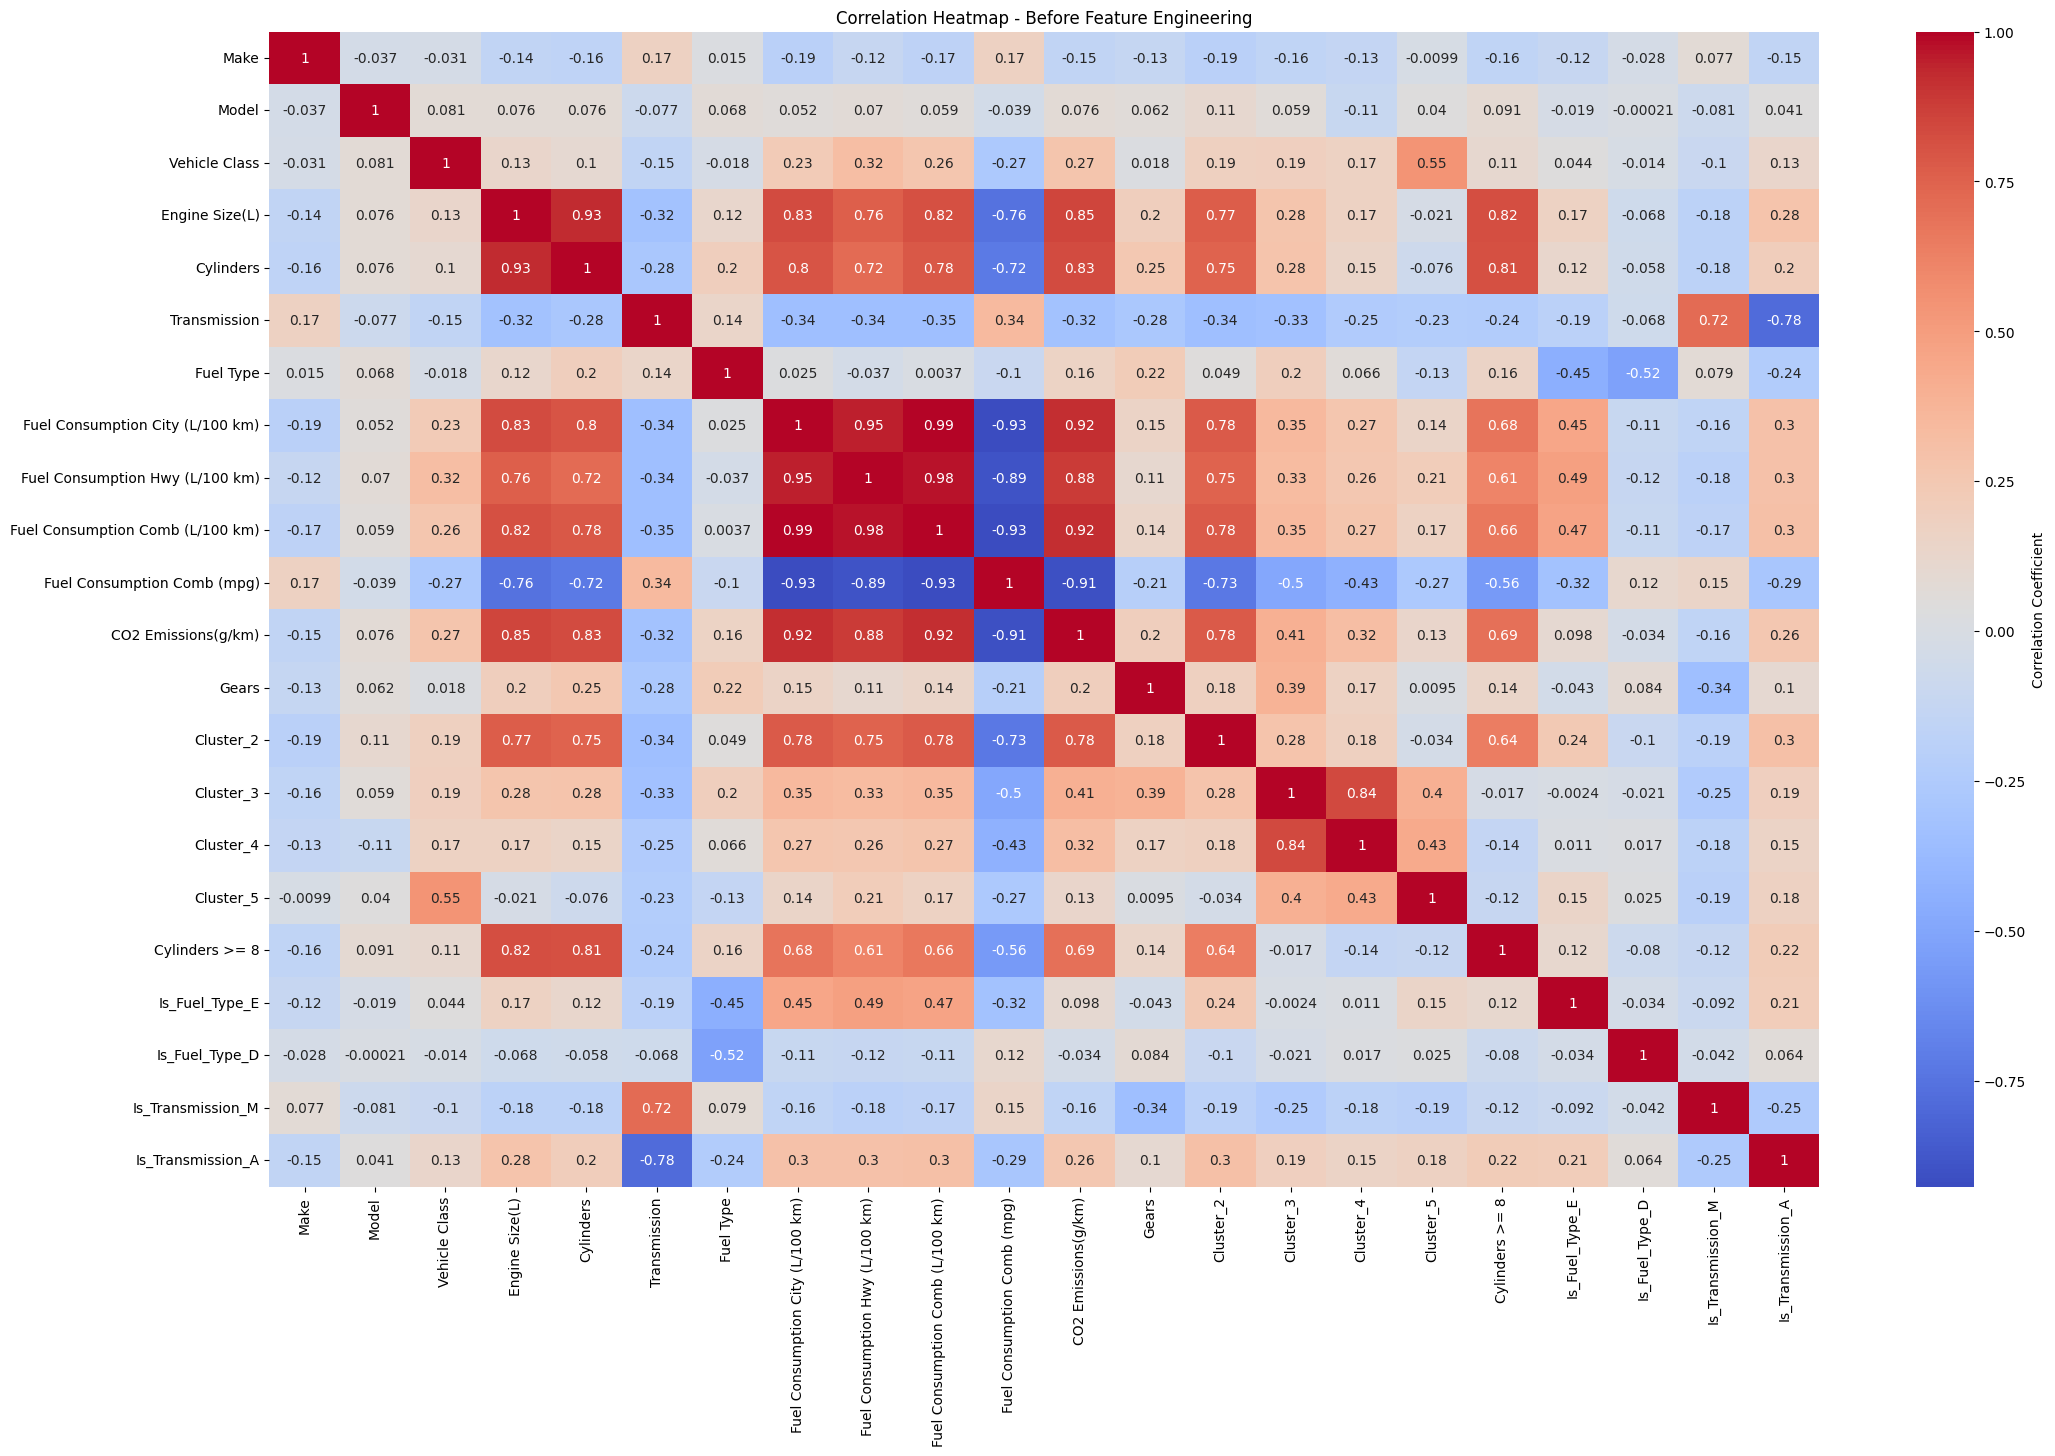

In [185]:
plt.figure(figsize=(25, 15))
sns.heatmap(trf_corr.corr(), annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap - Before Feature Engineering')
plt.show()

In [186]:
xtrain = trainf.drop(columns='CO2 Emissions(g/km)')
ytrain = trainf['CO2 Emissions(g/km)']

xtest = testf.drop(columns='CO2 Emissions(g/km)')
ytest = testf['CO2 Emissions(g/km)']

In [187]:
xtrain['Make'] = xtrain['Make'].astype('category')
xtrain['Model'] = xtrain['Model'].astype('category')
xtrain['Vehicle Class'] = xtrain['Vehicle Class'].astype('category')
xtrain['Transmission'] = xtrain['Transmission'].astype('category')
xtrain['Fuel Type'] = xtrain['Fuel Type'].astype('category')

xtest['Make'] = xtest['Make'].astype('category')
xtest['Model'] = xtest['Model'].astype('category')
xtest['Vehicle Class'] = xtest['Vehicle Class'].astype('category')
xtest['Transmission'] = xtest['Transmission'].astype('category')
xtest['Fuel Type'] = xtest['Fuel Type'].astype('category')

In [188]:
xtrain.head()

Make  Model             Vehicle Class  Engine Size(L)  Cylinders  \
6590      BMW  Other                SUBCOMPACT             3.0        6.0   
6274   NISSAN  Other      PICKUP TRUCK - SMALL             4.0        6.0   
2251     AUDI  Other                   COMPACT             3.0        6.0   
3149  PORSCHE  Other                TWO-SEATER             3.4        6.0   
4362    VOLVO  Other  STATION WAGON - MID-SIZE             2.0        4.0   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
6590           AS         Z                              11.4   
6274            A         X                              14.7   
2251            M         Z                              13.8   
3149           AM         Z                              11.3   
4362           AS         Z                              10.1   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  ...  \
6590                              8.1                               9.9  ...   
6274                             10.3                              12.7  ...   
2251                              9.0                              11.7  ...   
3149                              7.9                               9.8  ...   
4362                              7.0                               8.7  ...   

      Cluster_1  Cluster_2  Cluster_3  Cluster_4  Cluster_5  Cylinders >= 8  \
6590        0.0        0.0        2.0        2.0        2.0               0   
6274        0.0        1.0        2.0        3.0        3.0               0   
2251        0.0        0.0        2.0        3.0        2.0               0   
3149        0.0        0.0        2.0        2.0        4.0               0   
4362        0.0        0.0        0.0        0.0        4.0               0   

      Is_Fuel_Type_E  Is_Fuel_Type_D  Is_Transmission_M  Is_Transmission_A  
6590               0               0                  0                  0  
6274               0               0                  0                  1  
2251               0               0                  1                  0  
3149               0               0                  0                  0  
4362               0               0                  0                  0  

[5 rows x 22 columns]

In [189]:
xtrain.dtypes

Make                                category
Model                               category
Vehicle Class                       category
Engine Size(L)                       float64
Cylinders                            float64
Transmission                        category
Fuel Type                           category
Fuel Consumption City (L/100 km)     float64
Fuel Consumption Hwy (L/100 km)      float64
Fuel Consumption Comb (L/100 km)     float64
Fuel Consumption Comb (mpg)          float64
Gears                                float64
Cluster_1                            float64
Cluster_2                            float64
Cluster_3                            float64
Cluster_4                            float64
Cluster_5                            float64
Cylinders >= 8                         int64
Is_Fuel_Type_E                         int64
Is_Fuel_Type_D                         int64
Is_Transmission_M                      int64
Is_Transmission_A                      int64
dtype: obj

In [ ]:
xgb_model = xgb.XGBRegressor(
    tree_method='hist',          # Necessary for categorical support
    enable_categorical=True,     # Tells XGBoost to use the experimental categorical handling
    n_estimators=100,
    learning_rate=0.1, 
    random_state=42
)

xgb_model.fit(xtrain, ytrain)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [191]:
y_pred = xgb_model.predict(xtest)

In [192]:
xgb_model.fit(
    xtrain, ytrain,
    eval_set=[(xtrain, ytrain), (xtest, ytest)],
    verbose=True
)

[0]	validation_0-rmse:52.80383	validation_1-rmse:54.25316
[1]	validation_0-rmse:47.70112	validation_1-rmse:50.29999
[2]	validation_0-rmse:43.11722	validation_1-rmse:46.74878
[3]	validation_0-rmse:38.92766	validation_1-rmse:43.71747
[4]	validation_0-rmse:35.20456	validation_1-rmse:40.93910
[5]	validation_0-rmse:31.83440	validation_1-rmse:38.55516
[6]	validation_0-rmse:28.74746	validation_1-rmse:36.52431
[7]	validation_0-rmse:25.96554	validation_1-rmse:34.76031
[8]	validation_0-rmse:23.47107	validation_1-rmse:33.13685
[9]	validation_0-rmse:21.20748	validation_1-rmse:31.02858
[10]	validation_0-rmse:19.18484	validation_1-rmse:29.69120
[11]	validation_0-rmse:17.35420	validation_1-rmse:28.59350
[12]	validation_0-rmse:15.70329	validation_1-rmse:27.12666
[13]	validation_0-rmse:14.21978	validation_1-rmse:25.81884
[14]	validation_0-rmse:12.89493	validation_1-rmse:24.77409
[15]	validation_0-rmse:11.69502	validation_1-rmse:23.75640
[16]	validation_0-rmse:10.61968	validation_1-rmse:22.84169
[17]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [193]:
y_pred = xgb_model.predict(xtest)

In [194]:
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
r2 = r2_score(ytest, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

RMSE: 22.4141
R2 Score: 0.8539


In [ ]:
# ChatGPT generated
from sklearn.model_selection import KFold, cross_val_score


selected_features = []           # start with no features selected
remaining_features = list(xtrain.columns)
best_score = np.inf              # lower RMSE is better

kf = KFold(n_splits=10, shuffle=True, random_state=102)

while remaining_features:
    improvement = False
    scores = {}  # store CV RMSE for each candidate feature added to selected_features
    for feature in remaining_features:
        candidate_features = selected_features + [feature]
        # Cross-validate using these candidate features; note xtrain[candidate_features] remains a DataFrame 
        # with categorical columns intact.
        cv_scores = cross_val_score(xgb_model, xtrain[candidate_features], ytrain,
                                    cv=kf,
                                    scoring='neg_mean_squared_error',
                                    n_jobs=-1)
        # Compute average RMSE over folds
        cv_rmse = np.mean(np.sqrt(-cv_scores))
        scores[feature] = cv_rmse

    # Find the feature whose addition gives the lowest RMSE
    best_feature = min(scores, key=scores.get)
    best_feature_score = scores[best_feature]

    # If adding the best candidate improves performance, update selected_features
    if best_feature_score < best_score:
        best_score = best_feature_score
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        improvement = True
        print(f"Added feature: {best_feature}, New best CV RMSE: {best_score:.2f}")
    else:
        # Stop if no candidate improves the performance
        break

print("\nFinal selected features:", selected_features)


Added feature: Fuel Consumption Comb (L/100 km), New best CV RMSE: 18.79
Added feature: Fuel Type, New best CV RMSE: 2.90
Added feature: Fuel Consumption Hwy (L/100 km), New best CV RMSE: 2.79
Added feature: Gears, New best CV RMSE: 2.72
Added feature: Transmission, New best CV RMSE: 2.69
Added feature: Make, New best CV RMSE: 2.68
Added feature: Vehicle Class, New best CV RMSE: 2.66
Added feature: Model, New best CV RMSE: 2.64
Added feature: Fuel Consumption City (L/100 km), New best CV RMSE: 2.63
Added feature: Is_Transmission_M, New best CV RMSE: 2.63

Final selected features: ['Fuel Consumption Comb (L/100 km)', 'Fuel Type', 'Fuel Consumption Hwy (L/100 km)', 'Gears', 'Transmission', 'Make', 'Vehicle Class', 'Model', 'Fuel Consumption City (L/100 km)', 'Is_Transmission_M']


In [196]:
xtrain2 = xtrain[selected_features]
xtest2 = xtest[selected_features]

In [197]:
xgb_model = xgb.XGBRegressor(
    tree_method='hist',          # Necessary for categorical support
    enable_categorical=True,     # Tells XGBoost to use the experimental categorical handling
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(xtrain2, ytrain)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [198]:
y_pred = xgb_model.predict(xtest2)

In [199]:
xgb_model.fit(
    xtrain2, ytrain,
    eval_set=[(xtrain2, ytrain), (xtest2, ytest)],
    verbose=True
)

[0]	validation_0-rmse:52.73734	validation_1-rmse:52.89825
[1]	validation_0-rmse:47.57883	validation_1-rmse:47.69746
[2]	validation_0-rmse:42.92787	validation_1-rmse:42.99389
[3]	validation_0-rmse:38.73374	validation_1-rmse:38.76232
[4]	validation_0-rmse:34.95642	validation_1-rmse:34.96620
[5]	validation_0-rmse:31.55349	validation_1-rmse:31.57190
[6]	validation_0-rmse:28.48400	validation_1-rmse:28.51443
[7]	validation_0-rmse:25.72271	validation_1-rmse:25.75767
[8]	validation_0-rmse:23.23421	validation_1-rmse:23.25949
[9]	validation_0-rmse:20.99462	validation_1-rmse:21.02386
[10]	validation_0-rmse:18.97830	validation_1-rmse:19.01802
[11]	validation_0-rmse:17.16390	validation_1-rmse:17.22302
[12]	validation_0-rmse:15.53252	validation_1-rmse:15.61123
[13]	validation_0-rmse:14.06211	validation_1-rmse:14.16196
[14]	validation_0-rmse:12.74347	validation_1-rmse:12.86341
[15]	validation_0-rmse:11.55847	validation_1-rmse:11.71741
[16]	validation_0-rmse:10.49341	validation_1-rmse:10.69281
[17]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [200]:
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
r2 = r2_score(ytest, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

RMSE: 17.8499
R2 Score: 0.9074


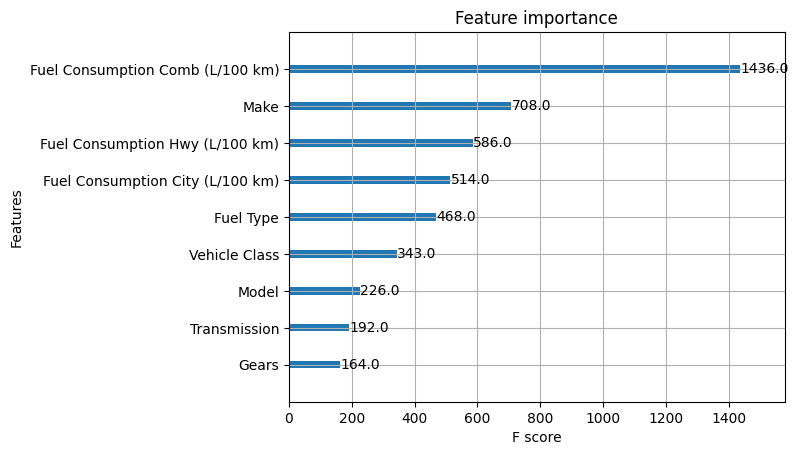

In [201]:
xgb.plot_importance(xgb_model)
plt.show()

In [218]:
path = 'C:/Users/javen/OneDrive/Desktop/Code/C02Emissions - E2E'

with open(path + '/model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)